## <font color = '#6495ED'>  ________________________ **Churn Classification - Telecom** _________________________
#### __________________________________________________________Year: 2025 __________________________________________________________

### <font color = '#6495ED'>**Telco Customer Churn Classification**</font>

#### *Problem Statement:*
In the telecom sector, where customers choose from various providers for communication and internet services, the challenge lies in retaining them. Service quality significantly influences customer perception, with even a brief maintenance break causing anxiety, highlighting our often-overlooked reliance on these services. Coupled with high customer acquisition costs, analyzing churn becomes critical. Churn rate, reflecting customer subscription cancellations, directly impacts revenue. Insights from churn analysis guide companies in formulating targeted strategies, improving service quality, and cultivating customer trust. Building predictive models and generating comprehensive churn analysis reports are imperative for sustained business growth.
“We want to identify clients with high probability of churn, were the retantion action generate positive ROI.”

#### *Aim :*
The objective is to categorize potential churn customers by leveraging both numerical and categorical features. This entails addressing a binary classification problem within the framework of a dataset exhibiting imbalances.

#### *Dataset Attributes*

The [dataset](https://github.com/virajbhutada/Telecom-Customer-Churn-Prediction-ML-PowerBI/blob/main/data/WA_Fn-UseC_-Telco-Customer-Churn.csv) encompasses diverse attributes providing valuable insights into customer details and interactions. Customer-specific details include a unique identifier (**customerID**), gender information, and a binary indicator denoting whether the customer is a senior citizen (**SeniorCitizen**).

Additional attributes capture relational aspects, such as whether the customer has a partner (**Partner**) and dependents (**Dependents**). The **tenure** attribute signifies the duration, in months, for which the customer has been associated with the company.

Communication services are represented by attributes like **PhoneService** and **MultipleLines**, indicating the presence of phone service and whether the customer has multiple lines. Internet-related features encompass the **InternetService** provider, online security (**OnlineSecurity**), online backup (**OnlineBackup**), device protection (**DeviceProtection**), and tech support (**TechSupport**).

Entertainment services are reflected in attributes like streaming TV (**StreamingTV**) and streaming movies (**StreamingMovies**). The **Contract** attribute reveals the duration of the customer's contract, with options such as month-to-month, one year, and two years.

Billing preferences are outlined through the **PaperlessBilling** attribute, indicating whether the customer opts for paperless billing. The **PaymentMethod** attribute specifies how customers choose to pay, with options like electronic check, mailed check, bank transfer (automatic), and credit card (automatic).

Financial details include the **MonthlyCharges** the customer incurs on a monthly basis and the overall **TotalCharges** accumulated.

Lastly, the critical attribute of **Churn** denotes whether the customer has churned, serving as a crucial factor in understanding customer retention dynamics.

### <font color = '#6495ED'>  **1. Libraries, Functions, Configuration and Datasets** </font>

#### <font color = '#6495ED'> **1.1. Import the Needed Libraries** </font>

In [159]:
# Core Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px
import os
from math import ceil
from datetime import datetime
from plotly.colors import qualitative

# Core Library Settings
pd.options.display.float_format = '{:.2f}'.format
sns.set()


from imblearn.combine import SMOTEENN # New: SMOTE-ENN
from imblearn.pipeline import Pipeline # New: Pipeline for imbalanced-learn

from sklearn.metrics import (classification_report, confusion_matrix, 
                           roc_auc_score, average_precision_score,
                           f1_score, fbeta_score, roc_curve, 
                           precision_recall_curve)

from sklearn.ensemble import RandomForestClassifier
import shap
# Utilities
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

# Data Preprocessing & Feature Engineering
from sklearn.preprocessing import (
    LabelEncoder,
    RobustScaler,
    MinMaxScaler,
    StandardScaler,
    OneHotEncoder
)
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline # General scikit-learn pipeline

# Feature Selection Methods
# Filter Methods
from sklearn.feature_selection import mutual_info_classif, SelectKBest, chi2
# Wrapper Methods
from sklearn.feature_selection import RFE
# Embedded Methods
from sklearn.linear_model import LassoCV # Often used for feature selection due to regularization
from sklearn.feature_selection import SelectFromModel # For embedded methods using feature_importance_ or coef_

# Imbalanced Learning Techniques
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline # Pipeline specific to imblearn
from imblearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, fbeta_score
from collections import Counter

# Machine Learning Models
# Linear Models
from sklearn.linear_model import LogisticRegression
# Support Vector Machines
from sklearn.svm import SVC
# Tree-based Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
# Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Model Selection & Evaluation
from sklearn.model_selection import (
    train_test_split,
    StratifiedGroupKFold,
    GridSearchCV,
    StratifiedKFold
)
from sklearn.metrics import (
    classification_report,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    average_precision_score,
    precision_recall_curve,
    fbeta_score,
    roc_curve,
    auc
)

# Model Interpretability
import shap
from catboost import Pool # Specific to CatBoost for data handling

# Statistics
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.signal import find_peaks
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours  
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter


#### <font color = '#6495ED'> **1.2. Data Analysis Helper Functions** </font>

In [2]:
# define a function to analyse cardinality
def categorical_summary(df):
    # get categorical columns
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns

    # loop through each column and print its details
    for col in categorical_columns:
        print(f'#### {col}')
        print(f"Unique values count: {df[col].nunique()}")
        print(f"Unique values: {df[col].unique()}")
        print("\n")

In [3]:
# define a function to analyse numerical column details
def numerical_summary(df):
    # get numerical columns
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

    # loop through each column and print its details
    for col in numerical_columns:
        print(f'#### {col}')
        print(f"Unique values count: {df[col].nunique()}")
        print(f"Minimum value: {df[col].min()}")
        print(f"Maximum value: {df[col].max()}")
        print(f"Mean: {df[col].mean()}")
        print(f"Median: {df[col].median()}")
        print(f"Standard Deviation: {df[col].std()}")
        print(f"Data type: {df[col].dtype}")
        print("\n")

In [4]:
# create function to check percentage of missing values over time
def missing_perc(data):
    missing_values = round((data.isnull().sum()/data.shape[0])*100,2)
    print(missing_values)

#### <font color = '#6495ED'>**1.3. Setup and Configuration**</font>

In [5]:
# permanently set the display option to show all columns
pd.set_option('display.max_columns', None)

#### <font color = '#6495ED'>**1.4. Import the Dataset** </font>

In [6]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### <font color = '#6495ED'> **2. Exploratory Data Analysis (EDA)** </font>

#### <font color = '#6495ED'> **2.1. Exploration of the Data** </font>

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
# to check how many rows and columns it has, respectively
df.shape

(7043, 21)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.00,0.16,0.37,0.00,0.00,0.00,0.00,1.00
tenure,7043.00,32.37,24.56,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.00,64.76,30.09,18.25,35.50,70.35,89.85,118.75


The dataset exhibits numerous features with text data, most likely representing categorical features. Notably, the **Total Charges** feature contains numerical values but is currently stored as a string datatype. As a first step, we will convert the entries in this column into floating-point numbers for further analysis.

During the conversion of the **TotalCharges** column to float, an error was encountered due to the presence of empty strings, preventing the direct conversion of string to float.

The issue arises because, though these elements were defined as strings, they did not appear as null values, and consequently, the missing values did not display anything. An example of this is a string variable defined as `a = ' '`. 

To address this, we have decided to drop the **customerID** column. Furthermore, we will categorize the features into two groups: numerical and categorical. Additionally, we will perform label encoding transformations for the categorical features to facilitate further analysis.

In [12]:
# Check for empty strings or spaces in the column
print(df['TotalCharges'].str.strip().eq('').sum())

11


Since there are only 11 problematic rows with empty spaces in the TotalCharges column, dropping them is a reasonable approach.

In [13]:
# Replace empty strings/spaces with NaN first
df['TotalCharges'] = df['TotalCharges'].replace(r'^\s*$', np.nan, regex=True)

# Now drop rows where TotalCharges is NaN (originally empty/spaces)
df = df.dropna(subset=['TotalCharges'])

# Finally convert to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [14]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(object)

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.00,32.42,24.55,1.00,9.00,29.00,55.00,72.00
MonthlyCharges,7032.00,64.80,30.09,18.25,35.59,70.35,89.86,118.75
TotalCharges,7032.00,2283.30,2266.77,18.80,401.45,1397.47,3794.74,8684.80


#### <font color = '#6495ED'>**2.2. Check Class Balance**</font>

In [16]:
class_counts = df['Churn'].value_counts(normalize=True)*100
print(class_counts)

Churn
No    73.42
Yes   26.58
Name: proportion, dtype: float64


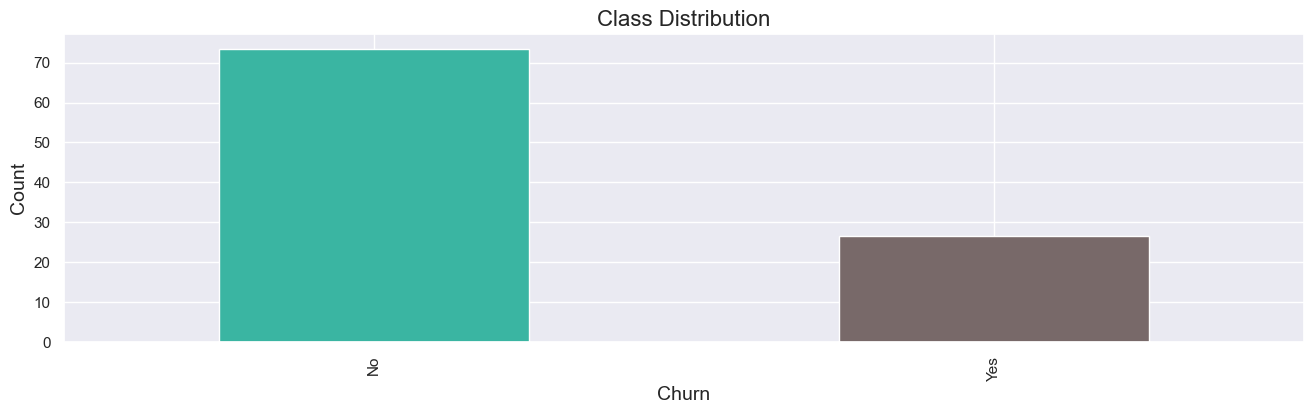

In [17]:
plt.figure(figsize=(16, 4))

# Define colors for 'No' and 'Yes' categories
colors = ['#3ab5a2', '#786969']

# Assuming 'class_counts' corresponds to the order of 'No' and 'Yes' categories
class_counts.plot(kind='bar', color=colors)

plt.title("Class Distribution", fontsize=16)
plt.xlabel("Churn", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

In [18]:
df.duplicated().sum()

np.int64(0)

#### <font color = '#6495ED'> **2.3. Split Dataset**</font>

In [19]:
# Drop rows with missing target values and encode the target variable in X_train
df['Churn'] = df['Churn'].map({'No': 0, 'Yes':1})

In [20]:
cols = list(df.columns)
cols.remove('Churn')

x = df.loc[:,cols]
y = df.loc[:,'Churn']

**Step 1: Split into Train (60%) + Temp (40%)**

In [21]:
# Define customerID como índice
df = df.set_index('customerID')

# Features (X) and target (y)
X = df.drop('Churn', axis=1) 
y = df['Churn']

# First split: Train (60%) and Temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, 
    test_size=0.4, 
    random_state=42, 
    stratify=y  # Preserve class balance
)

**Step 2: Split Temp into Validation (20%) and Test (20%)**

In [22]:
# Second split: Validation (50% of temp) and Test (50% of temp)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, 
    test_size=0.5, 
    random_state=42, 
    stratify=y_temp  # Maintain stratification
)

In [23]:
# Align indices to match
y_train.index = X_train.index
y_val.index = X_val.index
y_test.index = X_test.index

In [24]:
# check the shape of the splits
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (4219, 19)
Validation set shape: (1406, 19)
Test set shape: (1407, 19)


In [25]:
# check the shape of the splits
print(f"Training set shape: {y_train.shape}")
print(f"Validation set shape: {y_val.shape}")
print(f"Test set shape: {y_test.shape}")

Training set shape: (4219,)
Validation set shape: (1406,)
Test set shape: (1407,)


In [26]:
# Auto-detect categorical variables (object type and low-cardinality numeric)
categorical = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Numerical are the rest
numerical = X_train.columns.difference(categorical).tolist()

In [27]:
X_train[categorical].replace({0: 'No', 1: 'Yes'}).describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,4219,4219,4219,4219,4219,4219,4219,4219,4219,4219,4219,4219,4219,4219,4219,4219
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,2122,3532,2186,2963,3817,2028,1857,2071,1841,1840,2057,1668,1679,2312,2503,1408


#### <font color = '#6495ED'>**2.4. Univariate Analysis**</font>

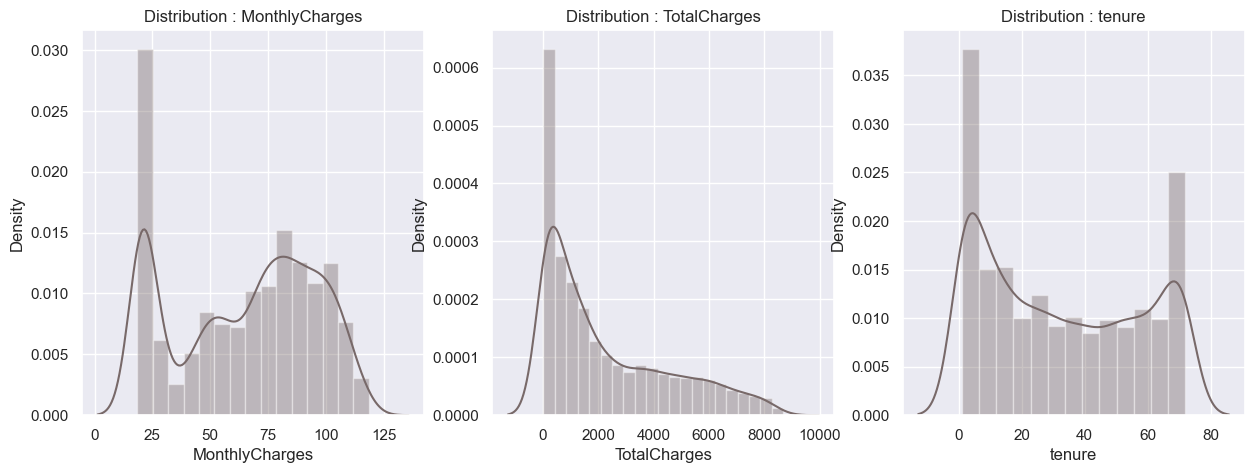

In [28]:
# Set colors for Churn 0 (Not-Churn) and Churn 1 (Churn)
colors = ['#3ab5a2', '#786969']  # 
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(len(numerical)):
    plt.subplot(1,3,i+1)
    sns.distplot(X_train[numerical[i]],color = colors[1])
    title = 'Distribution : ' + numerical[i]
    plt.title(title)
plt.show()

- **Tenure Distribution:**
  The tenure distribution exhibits a bimodal pattern with peaks at 0-70, indicating the presence of two distinct groups within the customer base.

- **MonthlyCharges Distribution:**
  MonthlyCharges create a bimodal distribution with peaks at 20-80, suggesting the existence of two prevalent cost structures or service tiers.

- **TotalCharges Distribution:**
  TotalCharges displays a positively or rightly skewed distribution, indicating a concentration of lower values with a gradual tapering towards higher values.

These numerical feature distributions provide valuable insights into the varied patterns within customer tenure, monthly charges, and total charges. Understanding these distributions aids in refining strategies for customer segmentation and engagement.

#### <font color = '#6495ED'>**2.5. Target Variable (Outcome) in Relation to Numerical Features**</font>

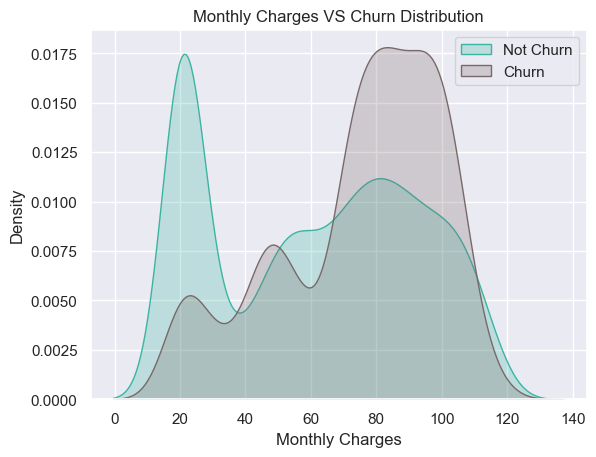

In [29]:
# Combine X_train and y_train for visualization
train_df = X_train.copy()
train_df['Churn'] = y_train

ax = sns.kdeplot(train_df.MonthlyCharges[(train_df["Churn"] == 0) ],
                color="#3ab5a2", shade = True);
ax = sns.kdeplot(train_df.MonthlyCharges[(train_df["Churn"] == 1) ],
                ax =ax, color="#786969", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Monthly Charges VS Churn Distribution');

Customers are more likely to churn due to the presence of high monthly charges.

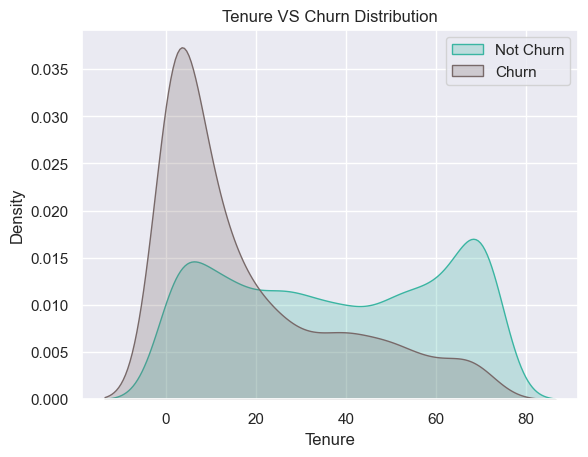

In [30]:
ax = sns.kdeplot(train_df.tenure[(train_df["Churn"] == 0) ],
                color="#3ab5a2", shade = True);
ax = sns.kdeplot(train_df.tenure[(train_df["Churn"] == 1) ],
                ax =ax, color="#786969", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Tenure');
ax.set_title('Tenure VS Churn Distribution');

Customers are more likely to churn in the beginning.

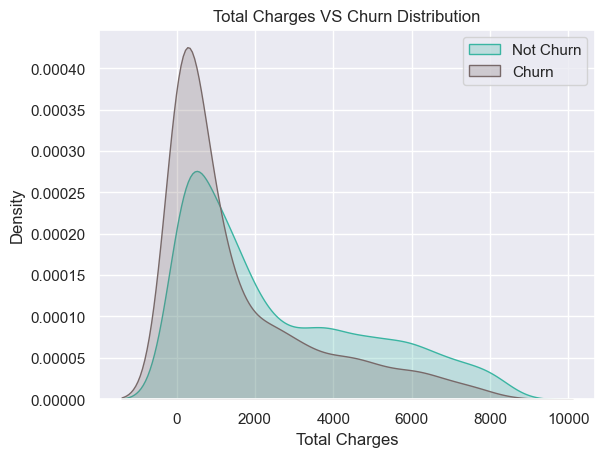

In [31]:
ax = sns.kdeplot(train_df.TotalCharges[(train_df["Churn"] == 0) ],
                color="#3ab5a2", shade = True);
ax = sns.kdeplot(train_df.TotalCharges[(train_df["Churn"] == 1) ],
                ax =ax, color="#786969", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Total Charges VS Churn Distribution');

Our churners mostly came from customers with low total charges, reflecting short tenures. This tells us that the first months are critical — churn happens early, often before we’ve built loyalty or delivered enough value.
That’s why our BI dashboard now tracks early-life customer behaviors and our AI model focuses on churn risk in the first 90 days.”

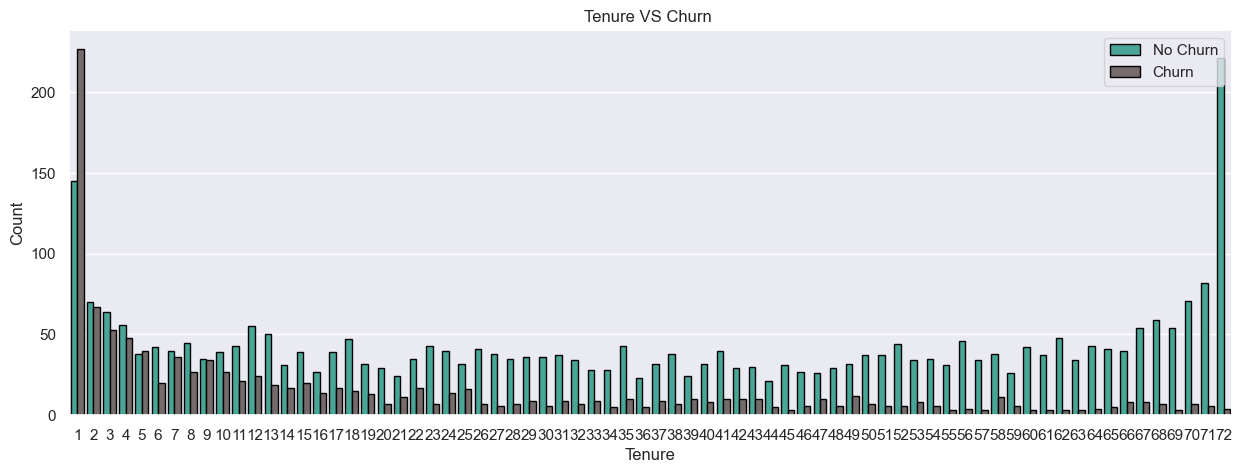

In [32]:
plt.figure(figsize = (15,5))
sns.countplot(x='tenure', data=train_df, hue='Churn', palette = colors, edgecolor='black')
plt.title('Tenure VS Churn ')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.legend(['No Churn', 'Churn'], loc='upper right')
plt.show()

- **Tenure Analysis:**
  A substantial number of customers exit within the first month, with high cancellations continuing for 4-5 months. However, churn numbers decrease as tenure increases. The graph exhibits a symmetrical pattern, with the left side dominated by high churn numbers and the right side characterized by lower churn numbers. This highlights a correlation between longer customer tenure and reduced likelihood of churn. Understanding and leveraging this trend can inform strategies to enhance customer retention over time.

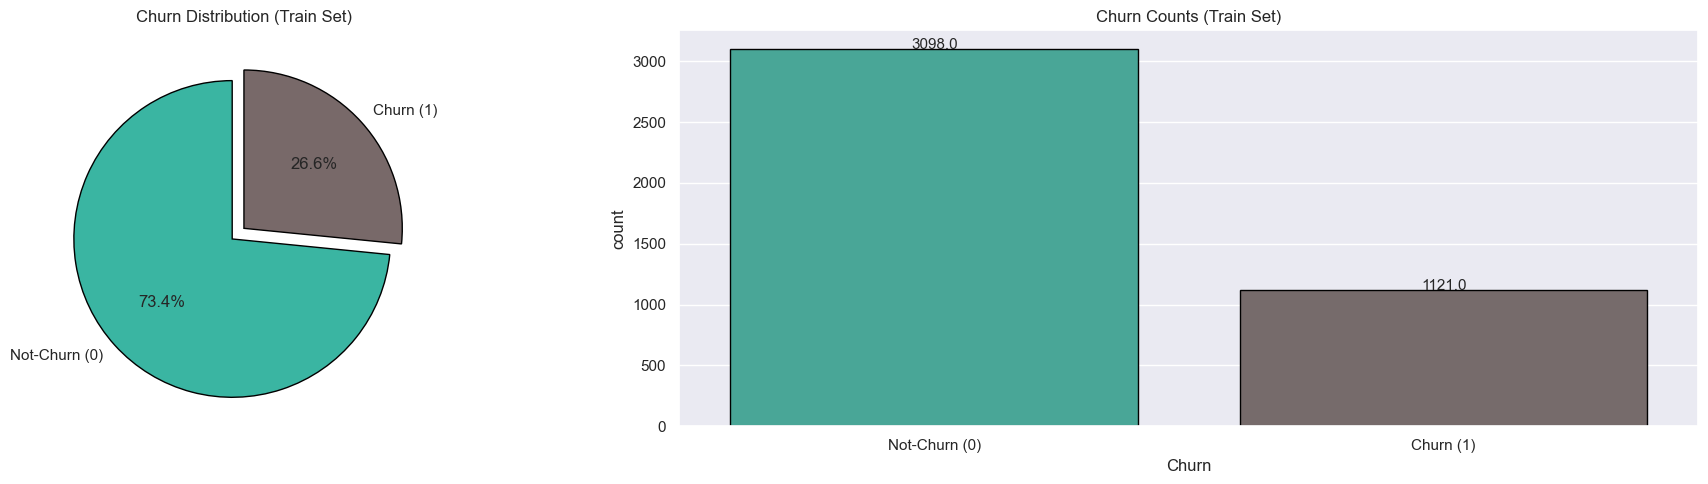

In [33]:
# Set colors for Churn 0 (Not-Churn) and Churn 1 (Churn)
colors = ['#3ab5a2', '#786969']   # Green for 0 (Not-Churn), Brown for 1 (Churn)

# Combine X_train and y_train for visualization
df_train = X_train.copy()
df_train['Churn'] = y_train

# Calculate percentages
churn_counts = df_train['Churn'].value_counts()
percentages = [churn_counts[0] / sum(churn_counts) * 100, 
               churn_counts[1] / sum(churn_counts) * 100]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Pie chart
axes[0].pie(percentages, 
            labels=['Not-Churn (0)', 'Churn (1)'], 
            autopct='%1.1f%%', 
            startangle=90, 
            explode=(0.1, 0),
            colors=colors, 
            wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
axes[0].set_title('Churn Distribution (Train Set)')

# Countplot
ax = sns.countplot(x='Churn', data=df_train, palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, 
            rect.get_height() + 2, 
            rect.get_height(),
            horizontalalignment='center', 
            fontsize=11)
ax.set_xticklabels(['Not-Churn (0)', 'Churn (1)'])
ax.set_title('Churn Counts (Train Set)')

plt.tight_layout()
plt.show()

The dataset exhibits an imbalanced distribution, with a ratio of approximately 3:1 for Not-Churn to Churn customers. This imbalance introduces a bias in predictions, where the model may lean towards accurately predicting Not-Churn instances.

Visualizations will vividly illustrate this disparity, emphasizing the challenge posed by the skewed distribution in the dataset. Addressing this class imbalance will be a crucial consideration in subsequent modeling steps to ensure a more accurate and meaningful predictive outcome.

In [34]:
# compute correlation with the target variable
correlation_with_target = X_train[numerical].corrwith(y_train).sort_values(ascending=False)

print("Correlation of numerical features with the target variable:")
print(round((correlation_with_target*100),2))

Correlation of numerical features with the target variable:
MonthlyCharges    20.12
TotalCharges     -19.01
tenure           -34.62
dtype: float64


**Key Insights from Your Results:**\
tenure (-34.62%): Strongest negative correlation → Customers with longer tenure are less likely to churn
Action: Focus retention efforts on newer customers

MonthlyCharges (+20.12%):Moderate positive correlation → Higher monthly bills correlate with more churn
Action: Review pricing tiers and value proposition

TotalCharges (-19.01%):Negative correlation → Customers who've spent more overall are less likely to leave
Combines tenure and monthly charges effects

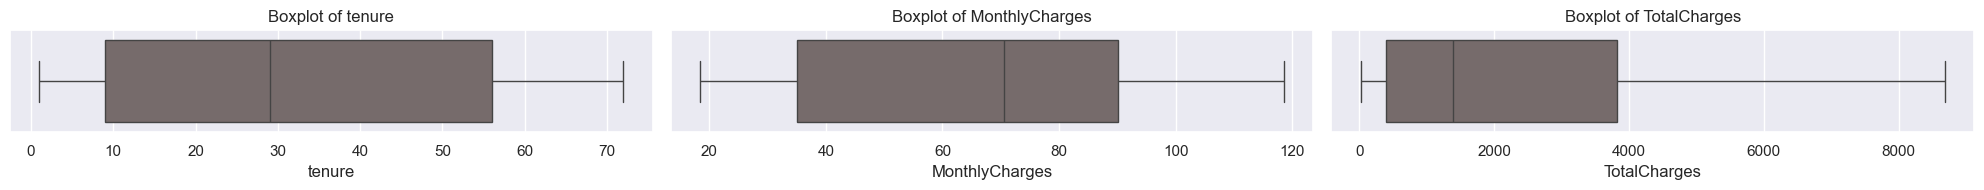

In [35]:
numerical = X_train.select_dtypes(include='number').columns.tolist()

fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(numerical):
    sns.boxplot(x=col, data=X_train, color="#786969", ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### <font color = '#6495ED'>**2.6. Categorical Features and Their Impact on the Target Variable (Churn)**</font>

In [36]:
l1 = ['gender','SeniorCitizen','Partner','Dependents'] # Customer Information
l2 = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'] # Services Signed Up for!
l3 = ['Contract','PaperlessBilling','PaymentMethod'] # Payment Information

To manage the abundance of categorical features in the dataset, we classify them into three groups based on their values or column names. This categorization aids in organizing and analyzing the features more effectively, allowing for a structured exploration of their impact on the target variable.

**Group 1: Customer Information**

This category encompasses attributes related to customer demographics and characteristics:

- **Gender**
- **SeniorCitizen**
- **Partner**
- **Dependents**

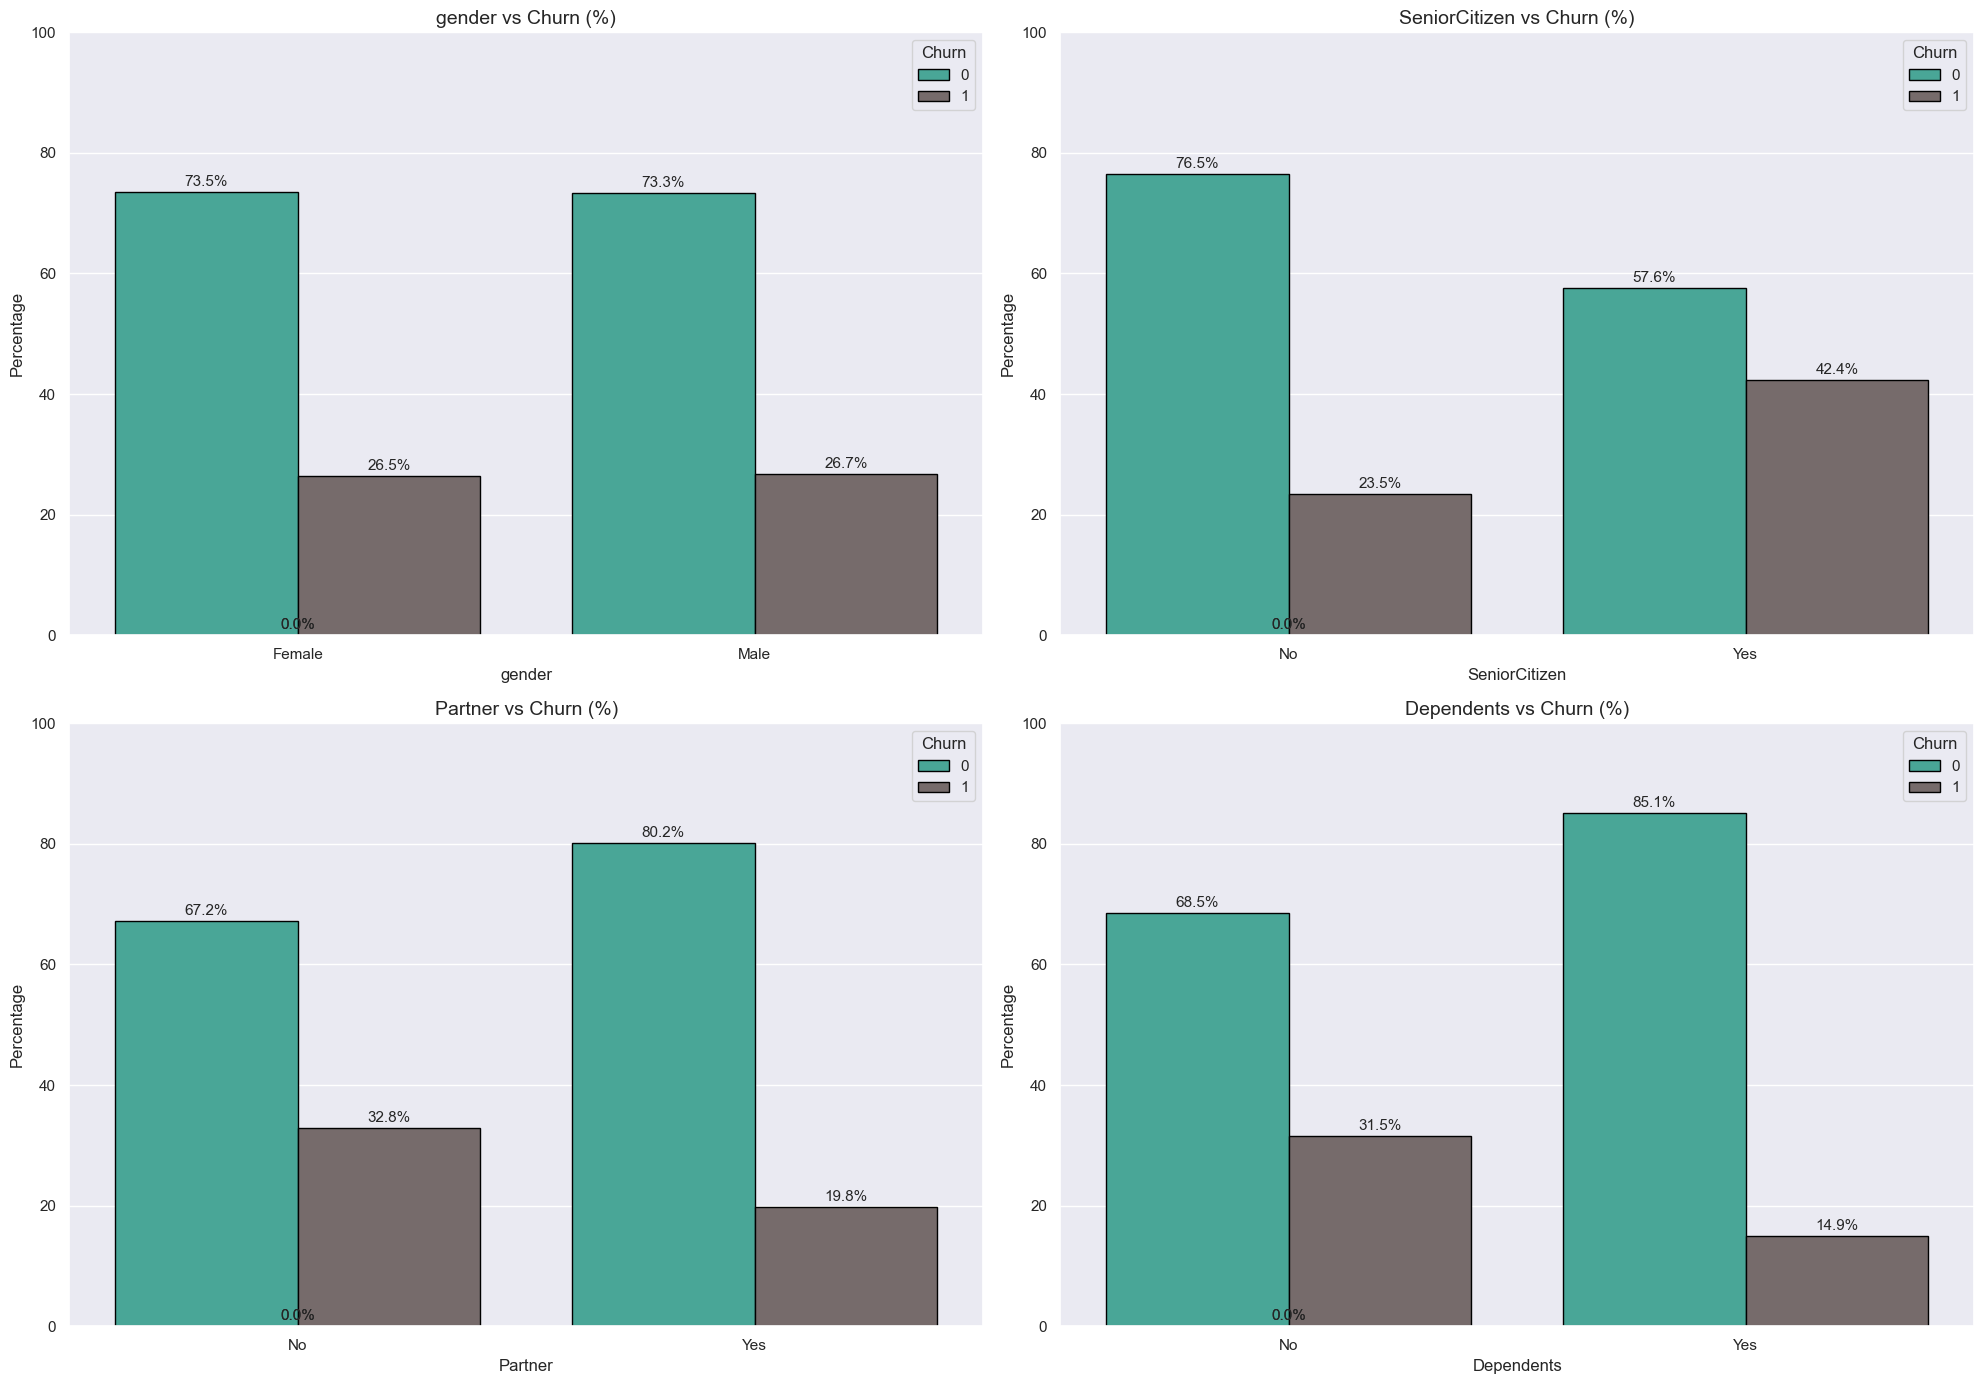

In [37]:
# Set up colors
colors = ['#3ab5a2', '#786969'] 



# Select 4 most interesting categorical features (excluding customerID)
selected_features = [col for col in categorical if col != 'customerID'][:4]

# Create figure
plt.figure(figsize=(20, 14))

# Create normalized countplots
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 2, i)
    
    # Calculate percentages
    prop_df = (train_df.groupby(feature)['Churn']
               .value_counts(normalize=True)
               .mul(100)
               .rename('Percentage')
               .reset_index())
    
    # Create plot
    ax = sns.barplot(x=feature, y='Percentage', hue='Churn', 
                    data=prop_df, palette=colors, edgecolor='black')
    
    # Add percentage labels
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
                height + 1,
                f'{height:.1f}%',
                ha='center',
                fontsize=11)
    
    plt.title(f'{feature} vs Churn (%)', fontsize=14)
    plt.ylabel('Percentage')
    plt.ylim(0, 100)  # Ensure percentage scale goes to 100%
    
    # Improve x-axis labels for binary features
    if set(train_df[feature].unique()).issubset({0, 1}):
        ax.set_xticklabels(['No' if x == 0 else 'Yes' for x in ax.get_xticks()])

plt.tight_layout()
plt.show()

- **Gender Churn Analysis:**
  Customer churn rates are comparable between male and female customers, indicating similarity in churn behavior across genders.

- **SeniorCitizen Analysis:**
  The number of SeniorCitizen customers is relatively low. However, among SeniorCitizens, approximately 40% experienced churn, accounting for 476 out of 1142 Senior Citizen customers.

- **Partner Status Impact:**
  Customers residing with a partner exhibit lower churn rates compared to those without a partner.

- **Dependents Influence:**
  Churn rates are higher for customers without dependents, suggesting a potential correlation between familial status and customer retention.

These observations provide insights into specific customer segments that may require targeted retention strategies. Understanding the nuanced behavior within these groups can aid in developing more tailored approaches for customer retention.

**Group 2: Customer-Enlisted Services**\
For visualization purposes, we'll categorize features related to services subscribed by the customer into two groups:

- **PhoneService**
- **MultipleLines**
- **InternetService**
- **StreamingTV**
- **StreamingMovies**

This segmentation allows for a focused examination of customer behavior in terms of the services they have subscribed to, aiding in the identification of patterns and trends within these service-related attributes.

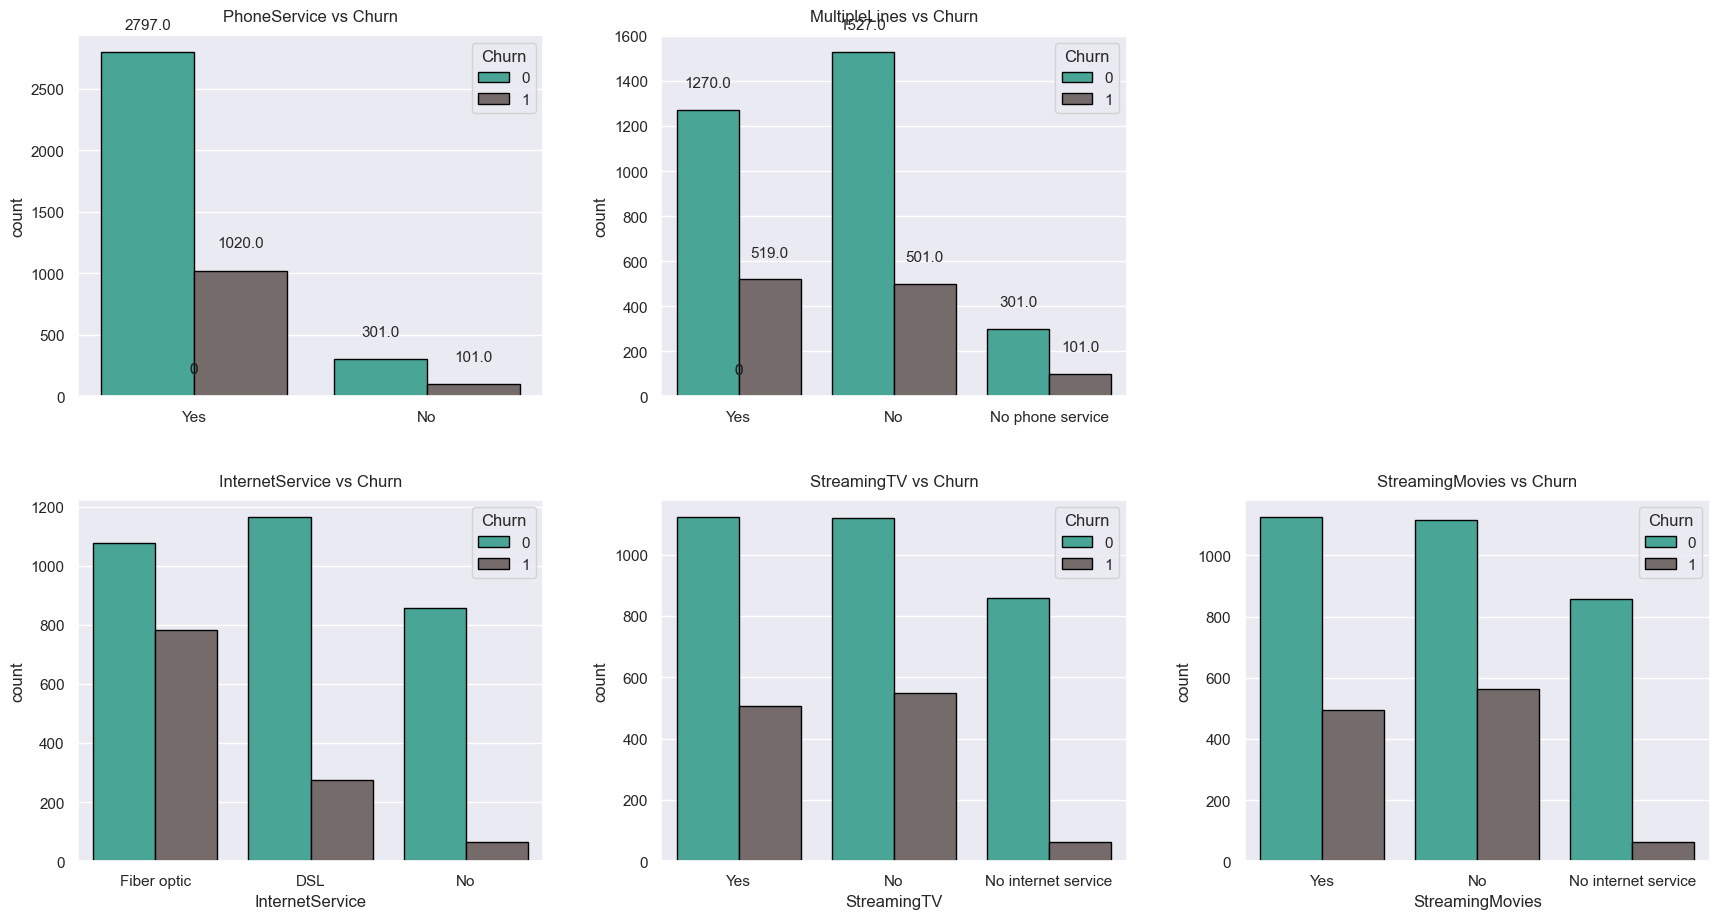

In [38]:
# Set colors
colors = ['#3ab5a2', '#786969']  

# Select features to visualize (assuming l2 contains categorical feature names)
selected_features = l2[:5]  # First 5 features from your list

# Create figure with 2 rows (for better organization)
plt.figure(figsize=(18, 10))

# First row: First 2 features
for i in range(2):
    plt.subplot(2, 3, i+1)  # 2 rows, 3 columns, position i+1
    ax = sns.countplot(x=selected_features[i], data=train_df, hue="Churn", 
                      palette=colors, edgecolor='black')
    
    # Add count labels
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2, 
                rect.get_height() + 0.05*train_df[selected_features[i]].value_counts().max(),
                f'{rect.get_height()}',
                ha='center', 
                fontsize=11)
    
    plt.title(f'{selected_features[i]} vs Churn', fontsize=12, pad=10)
    plt.xlabel('')
    
    # Improve binary feature labels
    if set(train_df[selected_features[i]].unique()).issubset({0, 1}):
        ax.set_xticklabels(['No' if x == 0 else 'Yes' for x in ax.get_xticks()])

# Second row: Middle feature (centered)
plt.subplot(2, 3, 4)
ax = sns.countplot(x=selected_features[2], data=train_df, hue="Churn",
                  palette=colors, edgecolor='black')
# [Add same labeling as above...]
plt.title(f'{selected_features[2]} vs Churn', fontsize=12, pad=10)

# Second row: Last 2 features
for i in range(3, 5):
    plt.subplot(2, 3, i+2)  # Positions 5 and 6
    ax = sns.countplot(x=selected_features[i], data=train_df, hue="Churn",
                      palette=colors, edgecolor='black')
    # [Add same labeling as above...]
    plt.title(f'{selected_features[i]} vs Churn', fontsize=12, pad=10)

plt.tight_layout(pad=3.0)
plt.show()

- **PhoneService Analysis:**
  Notably, a higher retention rate is observed among customers with no phone service compared to those who opted to discontinue the service.

- **MultipleLines Impact:**
  The churn rate appears consistent irrespective of whether customers have subscribed to multiple lines or not.

- **InternetService Preferences:**
  A considerable number of customers exhibit a preference against utilizing Fiber optic cables for InternetService. Conversely, the data suggests a greater inclination towards DSL among customers.

- **Insights on Streaming Services:**
  Both StreamingTV and StreamingMovies exhibit parallel churn patterns. Regardless of subscription status, a noteworthy number of customers have experienced churn. This implies that factors beyond streaming content alone contribute to customer disengagement.

These observations shed light on customer behavior concerning the services they avail, offering valuable insights for devising targeted strategies to enhance customer retention.

**Group 2: Customer-Enlisted Services**

This category comprises features related to security and support services subscribed by the customer:

- **OnlineSecurity**
- **OnlineBackup**
- **DeviceProtection**
- **TechSupport**

Exploring these attributes will provide insights into how customers engage with security and support services, guiding the development of strategies to enhance customer satisfaction and retention.

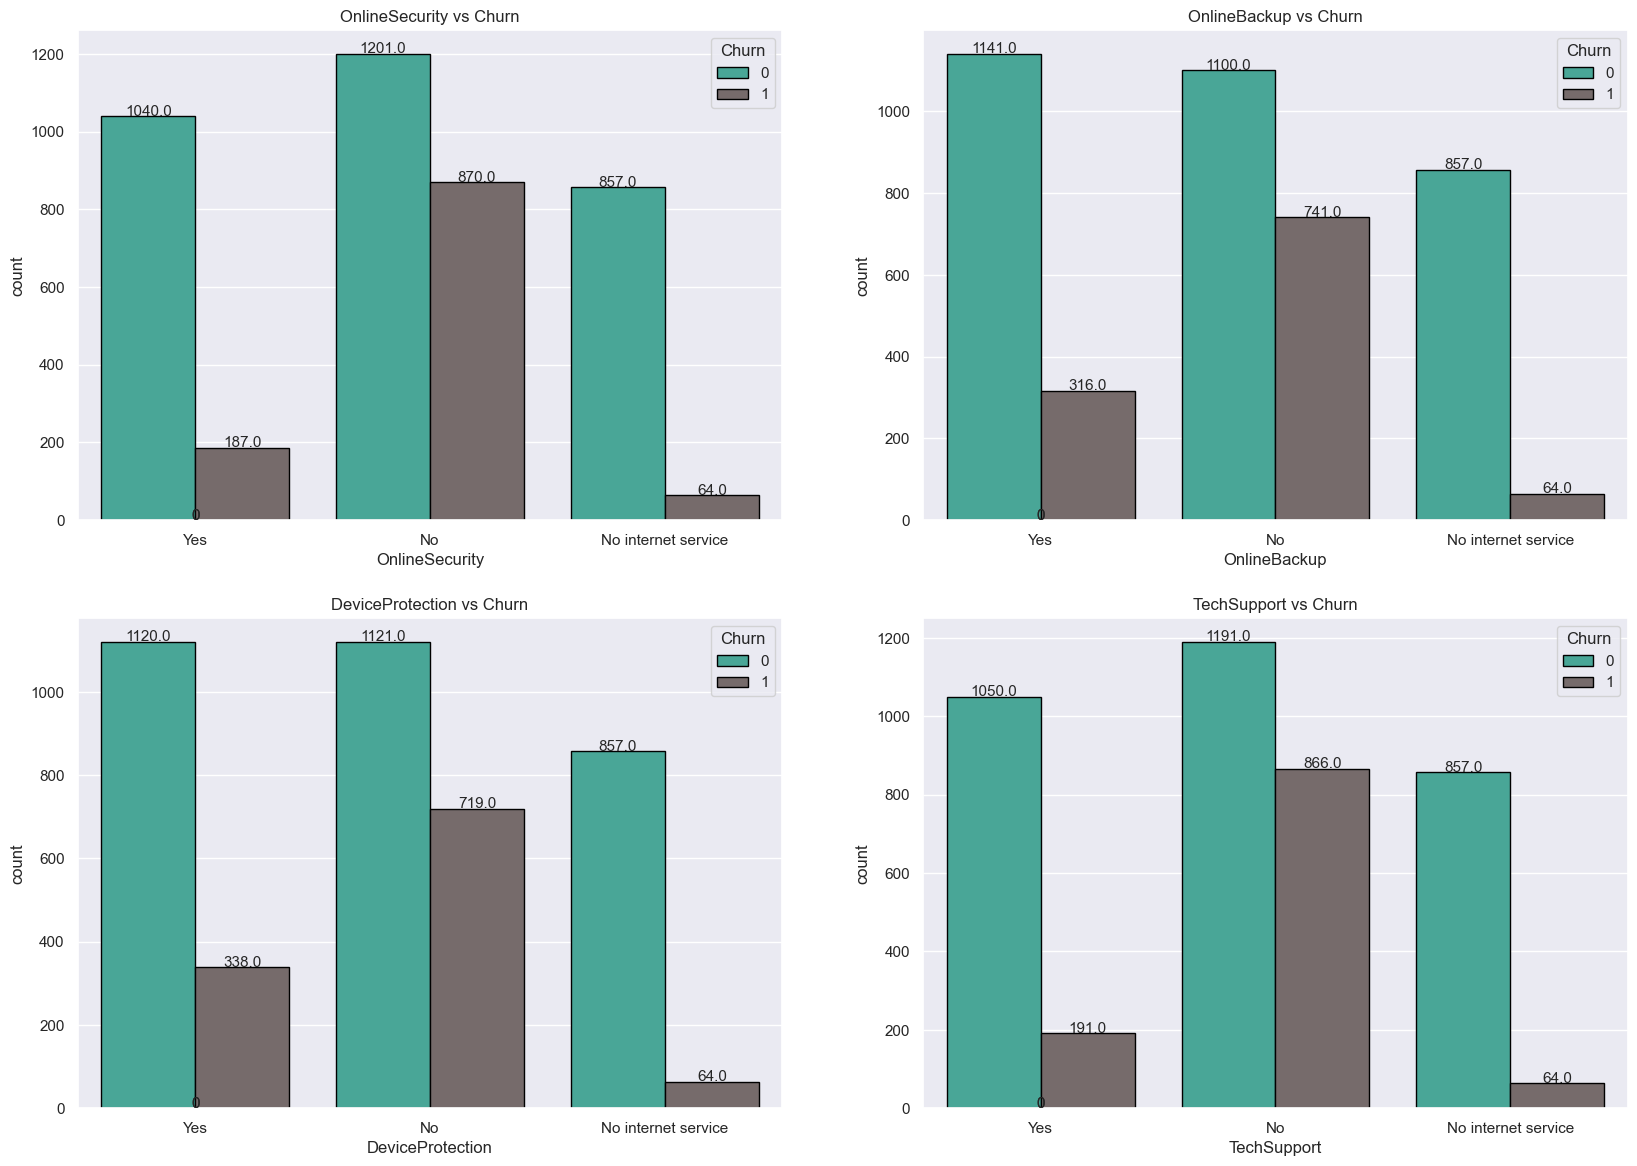

In [39]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.countplot(x=l2[-4 + i],data = df_train,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[-4 + i] + ' vs Churn'
    plt.title(title);

The visualizations indicate the critical importance of services related to OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport in retaining customers. A notable number of customers have opted to switch service providers, emphasizing the significance of providing robust and satisfactory services in these areas. These findings underscore the need for focused efforts in improving and promoting these services to enhance overall customer satisfaction and retention.

**Group**

This group encompasses features related to contractual terms, billing preferences, and payment methods:

- **Contract**
- **PaperlessBilling**
- **PaymentMethod**

Analyzing these attributes will provide insights into customer preferences regarding contractual commitments, billing processes, and payment methods, guiding strategies for optimizing customer satisfaction and retention.

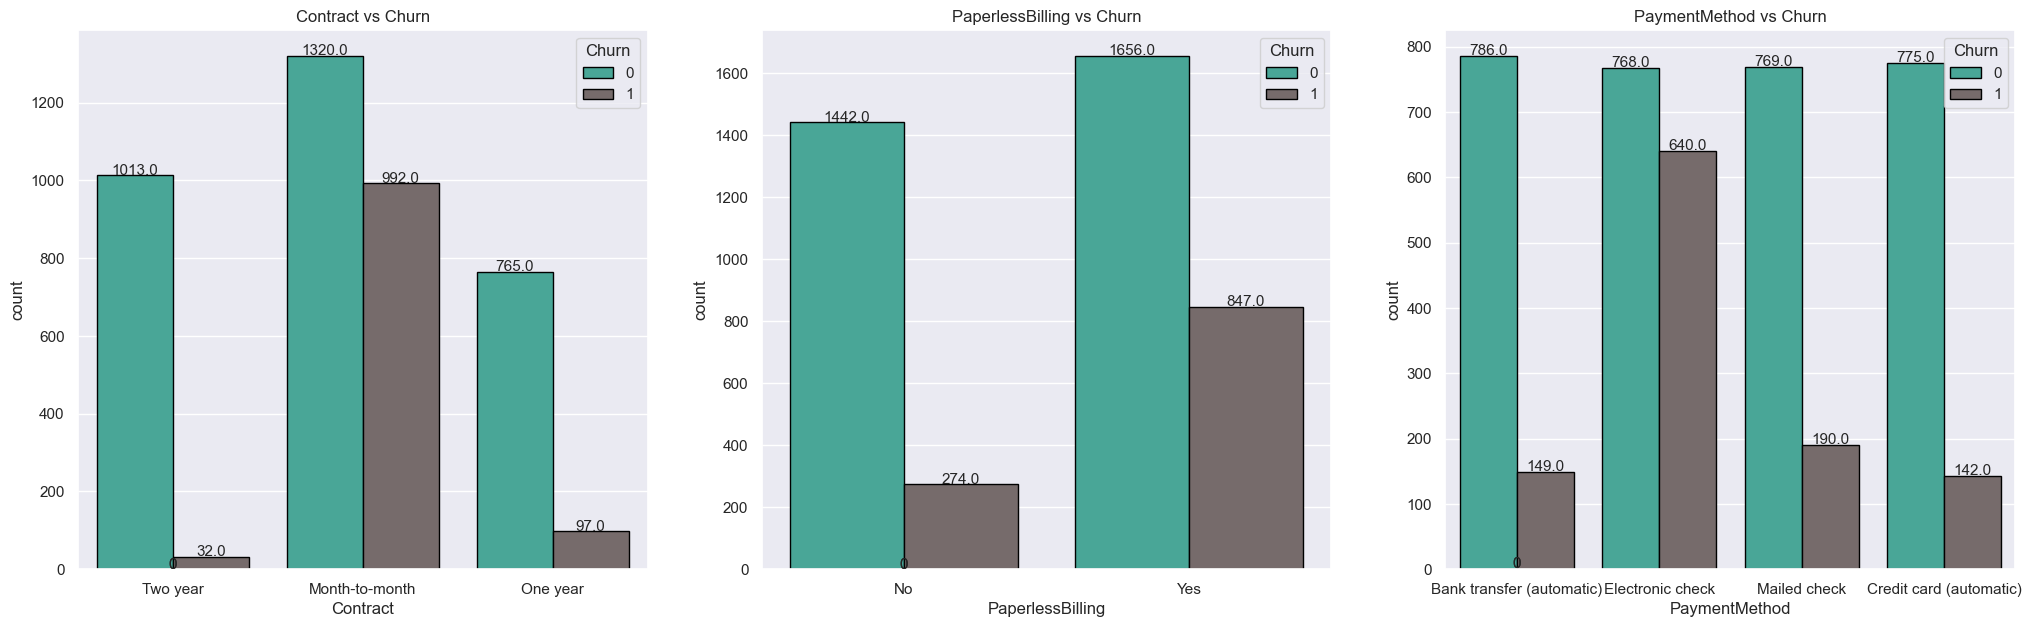

In [40]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

plt.subplot(1,3,1)
ax = sns.countplot(x=l3[0],data = df_train,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[0] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,2)
ax = sns.countplot(x=l3[1],data = df_train,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[1] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,3)
ax = sns.countplot(x=l3[2],data = df_train,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
     ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[2] + ' vs Churn'
plt.title(title);

- **Contract Analysis:**
  Customer churn is notably high for Month-to-Month contracts. This could be attributed to customers testing various services and opting for shorter-term commitments to explore available options or save costs.

- **PaperlessBilling Impact:**
  A considerable number of customers experience churn in the presence of PaperlessBilling, suggesting potential issues related to payment or receipt processes.

- **PaymentMethod Insights:**
  Customers exhibit a strong aversion to the Electronic check payment method. Of the 2365 bills paid using Electronic check, a significant 1071 customers chose to discontinue services. Addressing issues with Electronic check or reconsidering its inclusion may be necessary for improved customer satisfaction.

These observations underscore the importance of understanding customer preferences in contractual terms, billing methods, and payment processes. Implementing measures to address specific pain points can contribute significantly to customer retention efforts.

#### <font color = '#6495ED'>**2.7. Analysis of Categorical Features in Relation to Churn Cases**</font>

This investigation centers on examining the impact of categorical features specifically concerning customers who have experienced churn. The goal is to discern patterns, correlations, and influential factors among these categorical features within the context of churn cases. The findings from this analysis will provide valuable insights for optimizing strategies aimed at customer retention.

**Group 1: Customer Information**

In this grouping, we explore the relationship between customer information and churn cases, focusing on the following categorical features:

- **Gender**
- **SeniorCitizen**
- **Partner**
- **Dependents**

This analysis aims to uncover patterns and associations within these specific customer attributes concerning instances of customer churn.

In [41]:
gender = df_train[df_train['Churn'] == 1]['gender'].value_counts()
gender = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100] # Female / Male

seniorcitizen = df_train[df_train['Churn'] == 1]['SeniorCitizen'].value_counts()
seniorcitizen = [seniorcitizen[0] / sum(seniorcitizen) * 100,seniorcitizen[1] / sum(seniorcitizen) * 100] # No - Yes

partner = df_train[df_train['Churn'] == 1]['Partner'].value_counts()
partner = [partner[0] / sum(partner) * 100,partner[1] / sum(partner) * 100] # No - Yes

dependents = df_train[df_train['Churn'] == 1]['Dependents'].value_counts()
dependents = [dependents[0] / sum(dependents) * 100,dependents[1] / sum(dependents) * 100] # No - Yes

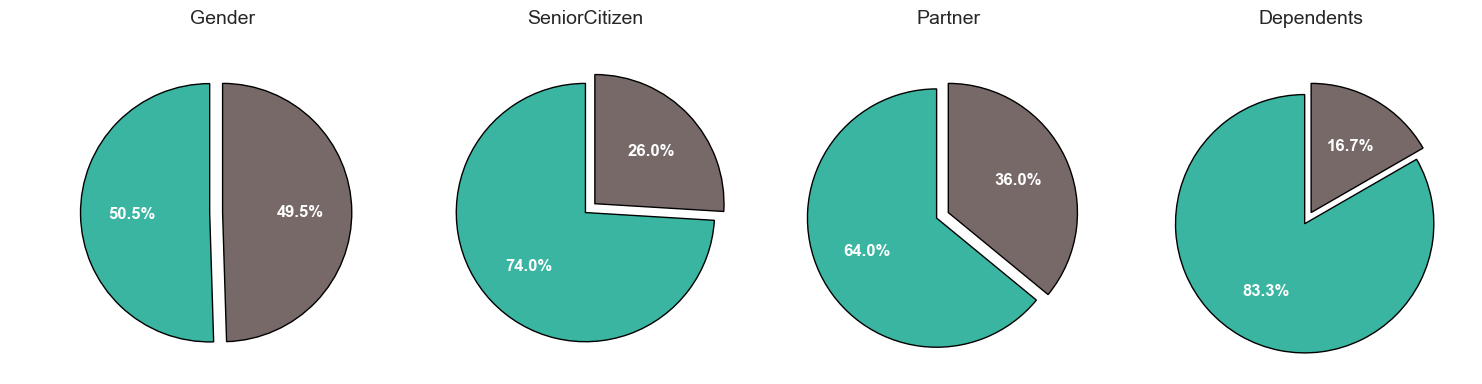

In [42]:
# Set up figure and axes
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 15))

# Define text properties for percentages
textprops = {'color': 'white', 'fontweight': 'bold', 'fontsize': 12}

# Plot 1: Gender
axes[0].pie(gender, labels=['Female', 'Male'], autopct='%1.1f%%', 
            startangle=90, explode=(0.1, 0), colors=colors,
            wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True},
            textprops=textprops)
axes[0].set_title('Gender', fontsize=14, pad=20)

# Plot 2: SeniorCitizen
axes[1].pie(seniorcitizen, labels=['No', 'Yes'], autopct='%1.1f%%',
           startangle=90, explode=(0, 0.1), colors=colors,
           wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True},
           textprops=textprops)
axes[1].set_title('SeniorCitizen', fontsize=14, pad=20)

# Plot 3: Partner
axes[2].pie(partner, labels=['No', 'Yes'], autopct='%1.1f%%',
           startangle=90, explode=(0.1, 0), colors=colors,
           wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True},
           textprops=textprops)
axes[2].set_title('Partner', fontsize=14, pad=20)

# Plot 4: Dependents
axes[3].pie(dependents, labels=['No', 'Yes'], autopct='%1.1f%%',
           startangle=90, explode=(0.1, 0), colors=colors,
           wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True},
           textprops=textprops)
axes[3].set_title('Dependents', fontsize=14, pad=20)

plt.tight_layout()
plt.show()

- **Gender Analysis:**
  A distinct 50% - 50% split is observed between male and female customers who have switched services. This suggests that the reasons for switching are likely related to service quality or specific processes that elicited negative reactions from customers.

- **SeniorCitizen Impact:**
  A substantial 75% of churned customers are not classified as SeniorCitizens. This highlights a critical area where the company should focus its attention for customer retention strategies.

- **Living Arrangements Influence:**
  Customers living independently, without partners or dependents, have prominently discontinued services. The data indicates that, on average, 73.4% of customers who churned were living independently.

These insights provide a targeted understanding of how specific customer information attributes relate to instances of churn. Addressing these aspects can contribute significantly to the development of effective customer retention initiatives.

**Group 2: Customer-Enlisted Services**

In this grouping, we investigate the relationship between services subscribed by the customer and instances of churn. The focus is on the following categorical features:

- **PhoneService**
- **MultipleLines**
- **InternetService**
- **StreamingTV**
- **StreamingMovies**

This analysis aims to uncover patterns and correlations within these specific service-related attributes concerning cases of customer churn.

In [43]:
phoneservice = df_train[df_train['Churn'] == 1]['PhoneService'].value_counts()
phoneservice = [phoneservice[0] / sum(phoneservice) * 100, phoneservice[1] / sum(phoneservice) * 100] # No - Yes

multiplelines = df_train[df_train['Churn'] == 1]['MultipleLines'].value_counts()
multiplelines = [multiplelines[0] / sum(multiplelines) * 100,multiplelines[1] / sum(multiplelines) * 100, multiplelines[2] / sum(multiplelines) * 100] # No - No Phone Service - Yes 

internetservice = df_train[df_train['Churn'] == 1]['InternetService'].value_counts()
internetservice = [internetservice[0] / sum(internetservice) * 100,internetservice[1] / sum(internetservice) * 100, internetservice[2] / sum(internetservice) * 100] # DSL - Fiber Optic - No 

streamingtv = df_train[df_train['Churn'] == 1]['StreamingTV'].value_counts()
streamingtv = [streamingtv[0] / sum(streamingtv) * 100,streamingtv[1] / sum(streamingtv) * 100, streamingtv[2] / sum(streamingtv) * 100] # No - No Internet Service - Yes 

streamingmovies = df_train[df_train['Churn'] == 1]['StreamingMovies'].value_counts()
streamingmovies = [streamingmovies[0] / sum(streamingmovies) * 100,streamingmovies[1] / sum(streamingmovies) * 100, streamingmovies[2] / sum(streamingmovies) * 100] # No - No Internet Service - Yes 

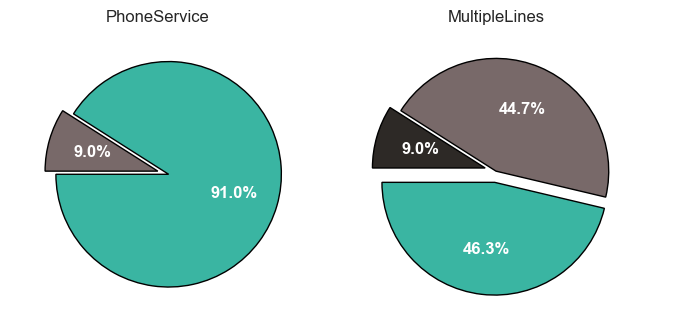

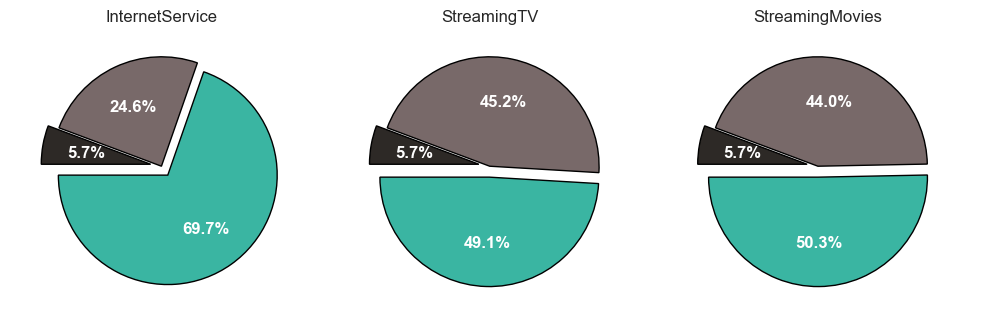

In [44]:
colors = ['#3ab5a2', '#786969','#2D2926' ]
ax,fig = plt.subplots(nrows = 1,ncols = 2,figsize = (8,8))

# Define text properties for percentages
textprops = {'color': 'white', 'fontweight': 'bold', 'fontsize': 12}

plt.subplot(1,2,1)
plt.pie(phoneservice,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 180,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True}, textprops=textprops)
plt.title('PhoneService');

plt.subplot(1,2,2)
plt.pie(multiplelines,labels = ['No','No Phone Service','Yes'],autopct='%1.1f%%',startangle = 180,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True}, textprops=textprops)
plt.title('MultipleLines');

ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(internetservice,labels = ['DSL', 'Fiber Optic','No'],autopct='%1.1f%%',startangle = 180,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True}, textprops=textprops)
plt.title('InternetService');

plt.subplot(1,3,2)
plt.pie(streamingtv,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 180,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True}, textprops=textprops)
plt.title('StreamingTV');

plt.subplot(1,3,3)
plt.pie(streamingmovies,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 180,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True}, textprops=textprops)
plt.title('StreamingMovies');


- **PhoneService Impact:**
  Despite the provision of PhoneService, a significant percentage of customers switched, suggesting dissatisfaction or other service-related issues.

- **MultipleLines Influence:**
  The availability of MultipleLines did not significantly affect customer unsubscription, indicating its limited impact on churn.

- **InternetService Preferences:**
  A notable 70% of customers opted out from services involving Fiber Optic cables for InternetService, signaling a strong preference against this technology.

- **Streaming Services Insights:**
  While customers without StreamingTV and StreamingMovies services tended to cancel their subscriptions, an average of 43.7% of customers with these services switched. This suggests that other factors beyond streaming content contribute to customer churn.

**Group 2: Customer-Enlisted Services**

In this grouping, we investigate the relationship between services subscribed by the customer and instances of churn. The focus is on the following categorical features:

- **PhoneService**
- **MultipleLines**
- **InternetService**
- **StreamingTV**
- **StreamingMovies**

This analysis aims to uncover patterns and correlations within these specific service-related attributes concerning cases of customer churn.

In [45]:
phoneservice = df_train[df_train['Churn'] == 1]['PhoneService'].value_counts()
phoneservice = [phoneservice[0] / sum(phoneservice) * 100, phoneservice[1] / sum(phoneservice) * 100] # No - Yes

multiplelines = df_train[df_train['Churn'] == 1]['MultipleLines'].value_counts()
multiplelines = [multiplelines[0] / sum(multiplelines) * 100,multiplelines[1] / sum(multiplelines) * 100, multiplelines[2] / sum(multiplelines) * 100] # No - No Phone Service - Yes 

internetservice = df_train[df_train['Churn'] == 1]['InternetService'].value_counts()
internetservice = [internetservice[0] / sum(internetservice) * 100,internetservice[1] / sum(internetservice) * 100, internetservice[2] / sum(internetservice) * 100] # DSL - Fiber Optic - No 

streamingtv = df_train[df_train['Churn'] == 1]['StreamingTV'].value_counts()
streamingtv = [streamingtv[0] / sum(streamingtv) * 100,streamingtv[1] / sum(streamingtv) * 100, streamingtv[2] / sum(streamingtv) * 100] # No - No Internet Service - Yes 

streamingmovies = df_train[df_train['Churn'] == 1]['StreamingMovies'].value_counts()
streamingmovies = [streamingmovies[0] / sum(streamingmovies) * 100,streamingmovies[1] / sum(streamingmovies) * 100, streamingmovies[2] / sum(streamingmovies) * 100] # No - No Internet Service - Yes 

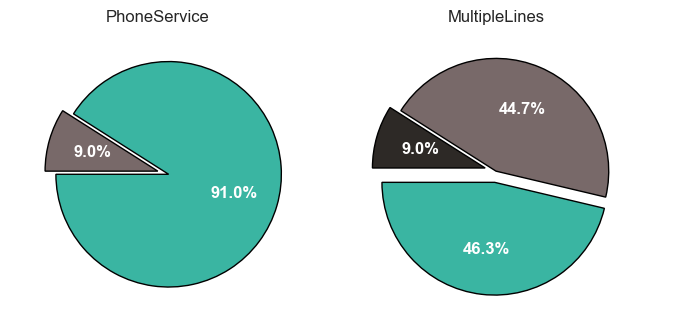

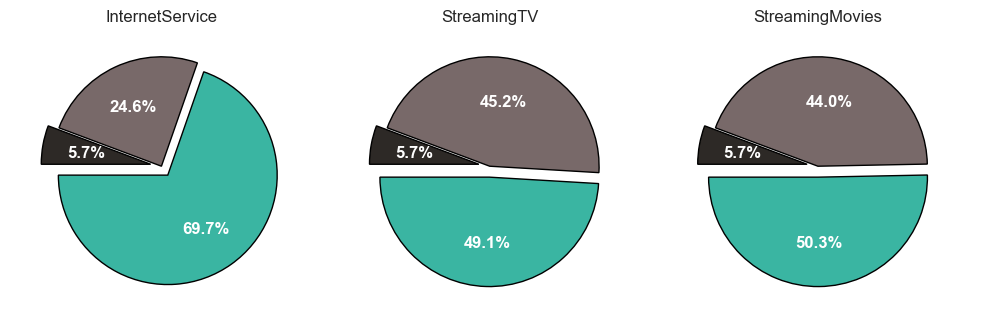

In [46]:
colors = ['#3ab5a2', '#786969','#2D2926'  ]
ax,fig = plt.subplots(nrows = 1,ncols = 2,figsize = (8,8))

plt.subplot(1,2,1)
plt.pie(phoneservice,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 180,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True}, textprops=textprops)
plt.title('PhoneService');

plt.subplot(1,2,2)
plt.pie(multiplelines,labels = ['No','No Phone Service','Yes'],autopct='%1.1f%%',startangle = 180,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True}, textprops=textprops)
plt.title('MultipleLines');

ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(internetservice,labels = ['DSL', 'Fiber Optic','No'],autopct='%1.1f%%',startangle = 180,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True}, textprops=textprops)
plt.title('InternetService');

plt.subplot(1,3,2)
plt.pie(streamingtv,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 180,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True}, textprops=textprops)
plt.title('StreamingTV');

plt.subplot(1,3,3)
plt.pie(streamingmovies,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 180,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True}, textprops=textprops)
plt.title('StreamingMovies');


The pie charts above underscore the critical importance of providing OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport services. On average, a substantial 71.6% of customers terminated their services due to the absence of these essential features. This highlights a clear correlation between the provision of robust security and support services and customer retention, emphasizing the need for strategic enhancements in these areas.

**Group 3**

This grouping delves into the relationship between contract terms, billing preferences, and payment methods selected by the customer, specifically in the context of instances of churn. The categorical features under scrutiny are:

- **Contract**
- **PaperlessBilling**
- **PaymentMethod**

Analyzing these attributes aims to reveal patterns and correlations within these specific contractual and financial service-related features concerning cases of customer churn.

In [47]:
contract = df_train[df_train['Churn'] == 1]['Contract'].value_counts()
contract = [contract[0] / sum(contract) * 100, contract[1] / sum(contract) * 100, contract[2] / sum(contract) * 100] # Month-to-month - One year - Two year

paperlessbilling = df_train[df_train['Churn'] == 1]['PaperlessBilling'].value_counts()
paperlessbilling = [paperlessbilling[0] / sum(paperlessbilling) * 100,paperlessbilling[1] / sum(paperlessbilling) * 100] # No - Yes 

paymentmethod = df_train[df_train['Churn'] == 1]['PaymentMethod'].value_counts()
paymentmethod = [paymentmethod[0] / sum(paymentmethod) * 100, paymentmethod[1] / sum(paymentmethod) * 100, 
            paymentmethod[2] / sum(paymentmethod) * 100, paymentmethod[3] / sum(paymentmethod) * 100] 
            # Bank Transfer (automatic) - Credit Card (automatic) - Electronic check - Mailed check

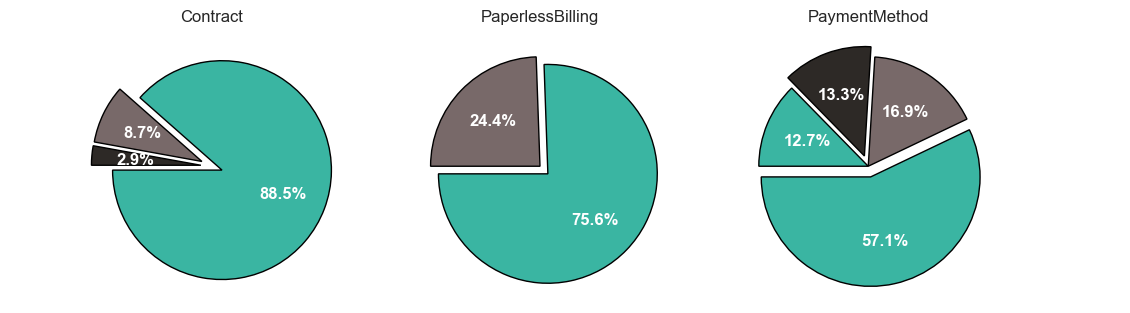

In [48]:
colors = ['#3ab5a2', '#786969','#2D2926' ]
ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(contract,labels = ['Month-to-month','One year','Two year'],autopct='%1.1f%%',startangle = 180,explode = (0.1,0.1,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True}, textprops=textprops)
plt.title('Contract');

plt.subplot(1,3,2)
plt.pie(paperlessbilling,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 180,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True}, textprops=textprops)
plt.title('PaperlessBilling');

plt.subplot(1,3,3)
plt.pie(paymentmethod,labels = ['Bank Transfer (automatic)','Credit Card (automatic)','Electronic check','Mailed check'],autopct='%1.1f%%',startangle = 180,explode = (0.1,0,0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True}, textprops=textprops)
plt.title('PaymentMethod');


- **Contract Duration Impact:**
  Monthly contracts dominate customer churn, with a substantial 88.6% share. This highlights the need to explore alternatives or incentives for longer-term commitments.

- **PaperlessBilling Analysis:**
  PaperlessBilling does not garner positive sentiment among customers, evident from the significant churn associated with this billing method.

- **PaymentMethod Insights:**
  Electronic check emerges as a significant concern, contributing to 57.3% of churn. Addressing issues with this payment method is crucial. Mailed check, Bank Transfer (automatic), and Credit Card (automatic) follow, necessitating attention to improve the overall payment experience for customers.

These findings provide actionable insights for refining contract terms, billing preferences, and payment methods to enhance customer satisfaction and retention.

In [49]:
def categorical_summary(df):
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns

    # collect summary data for all categorical columns
    summary_data = []
    for col in categorical_columns:
        summary_data.append({
            'Column Name': col,
            'Unique Count': df[col].nunique(),
            'Unique Values': df[col].unique()[:5],
            'Data Type': df[col].dtype
        })
    # convert int into a dataframe
    # for better display
    summary_df = pd.DataFrame(summary_data)
    print("\nCategorical Summary:\n")
    print(summary_df.to_markdown(index=False))

categorical_summary(X_train)


Categorical Summary:

| Column Name      |   Unique Count | Unique Values                                                  | Data Type   |
|:-----------------|---------------:|:---------------------------------------------------------------|:------------|
| gender           |              2 | ['Male' 'Female']                                              | object      |
| SeniorCitizen    |              2 | [0 1]                                                          | object      |
| Partner          |              2 | ['No' 'Yes']                                                   | object      |
| Dependents       |              2 | ['No' 'Yes']                                                   | object      |
| PhoneService     |              2 | ['Yes' 'No']                                                   | object      |
| MultipleLines    |              3 | ['Yes' 'No' 'No phone service']                                | object      |
| InternetService  |              3 | ['F

### <font color = '#6495ED'>**3. Data Preprocessing**</font>

#### <font color = '#6495ED'>**3.1. Feature Engineering**</font>

**New Numerical Variables**

In [50]:
service_columns = [
    'PhoneService', 'MultipleLines', 'InternetService', 
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]
# List of all service columns
service_columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Calculate total services (0-9 possible)
X_train['TotalServices'] = X_train.apply(lambda x: sum(
    1 for col in service_columns 
    if x[col] in ['Yes', 'DSL', 'Fiber optic']  # Count active services
), axis=1)

X_test['TotalServices'] = X_test.apply(lambda x: sum(
    1 for col in service_columns 
    if x[col] in ['Yes', 'DSL', 'Fiber optic']  # Count active services
), axis=1)

X_val['TotalServices'] = X_val.apply(lambda x: sum(
    1 for col in service_columns 
    if x[col] in ['Yes', 'DSL', 'Fiber optic']  # Count active services
), axis=1)

# Calculate service utilization ratio (0-1 scale)
max_possible_services = 9
X_train['ServiceUtilization'] = X_train['TotalServices'] / max_possible_services
X_test['ServiceUtilization'] = X_test['TotalServices'] / max_possible_services
X_val['ServiceUtilization'] = X_val['TotalServices'] / max_possible_services

# Calculate services per tenure month (with tenure +1 adjustment)
X_train['ServicesPerMonth'] = X_train['TotalServices'] / (X_train['tenure'] + 1)  # +1 avoids division by zero
X_test['ServicesPerMonth'] = X_test['TotalServices'] / (X_test['tenure'] + 1)  # +1 avoids division by zero
X_val['ServicesPerMonth'] = X_val['TotalServices'] / (X_val['tenure'] + 1)  # +1 avoids division by zero

# Create composite service score (0-1 scale)
X_train['ServiceScore'] = (X_train['ServiceUtilization'] * 0.7 + 
                     (1 - X_train['ServicesPerMonth'].rank(pct=True)) * 0.3)
X_test['ServiceScore'] = (X_test['ServiceUtilization'] * 0.7 + 
                     (1 - X_test['ServicesPerMonth'].rank(pct=True)) * 0.3)
X_val['ServiceScore'] = (X_val['ServiceUtilization'] * 0.7 + 
                     (1 - X_val['ServicesPerMonth'].rank(pct=True)) * 0.3)

# Show sample results
print(X_train[['TotalServices', 'ServiceUtilization', 
         'ServicesPerMonth', 'ServiceScore']].head(10).to_markdown())

| customerID   |   TotalServices |   ServiceUtilization |   ServicesPerMonth |   ServiceScore |
|:-------------|----------------:|---------------------:|-------------------:|---------------:|
| 8670-ERCJH   |               9 |             1        |          0.123288  |       0.866817 |
| 0674-EYYZV   |               3 |             0.333333 |          1.5       |       0.242399 |
| 4608-LCIMN   |               2 |             0.222222 |          0.222222  |       0.254074 |
| 4933-BSAIP   |               1 |             0.111111 |          0.0243902 |       0.363414 |
| 2239-JALAW   |               7 |             0.777778 |          0.118644  |       0.719474 |
| 0268-QKIWO   |               1 |             0.111111 |          0.25      |       0.167692 |
| 1285-OKIPP   |               3 |             0.333333 |          1.5       |       0.242399 |
| 4403-BWPAY   |               2 |             0.222222 |          0.133333  |       0.307902 |
| 4947-DSMXK   |               6 |      

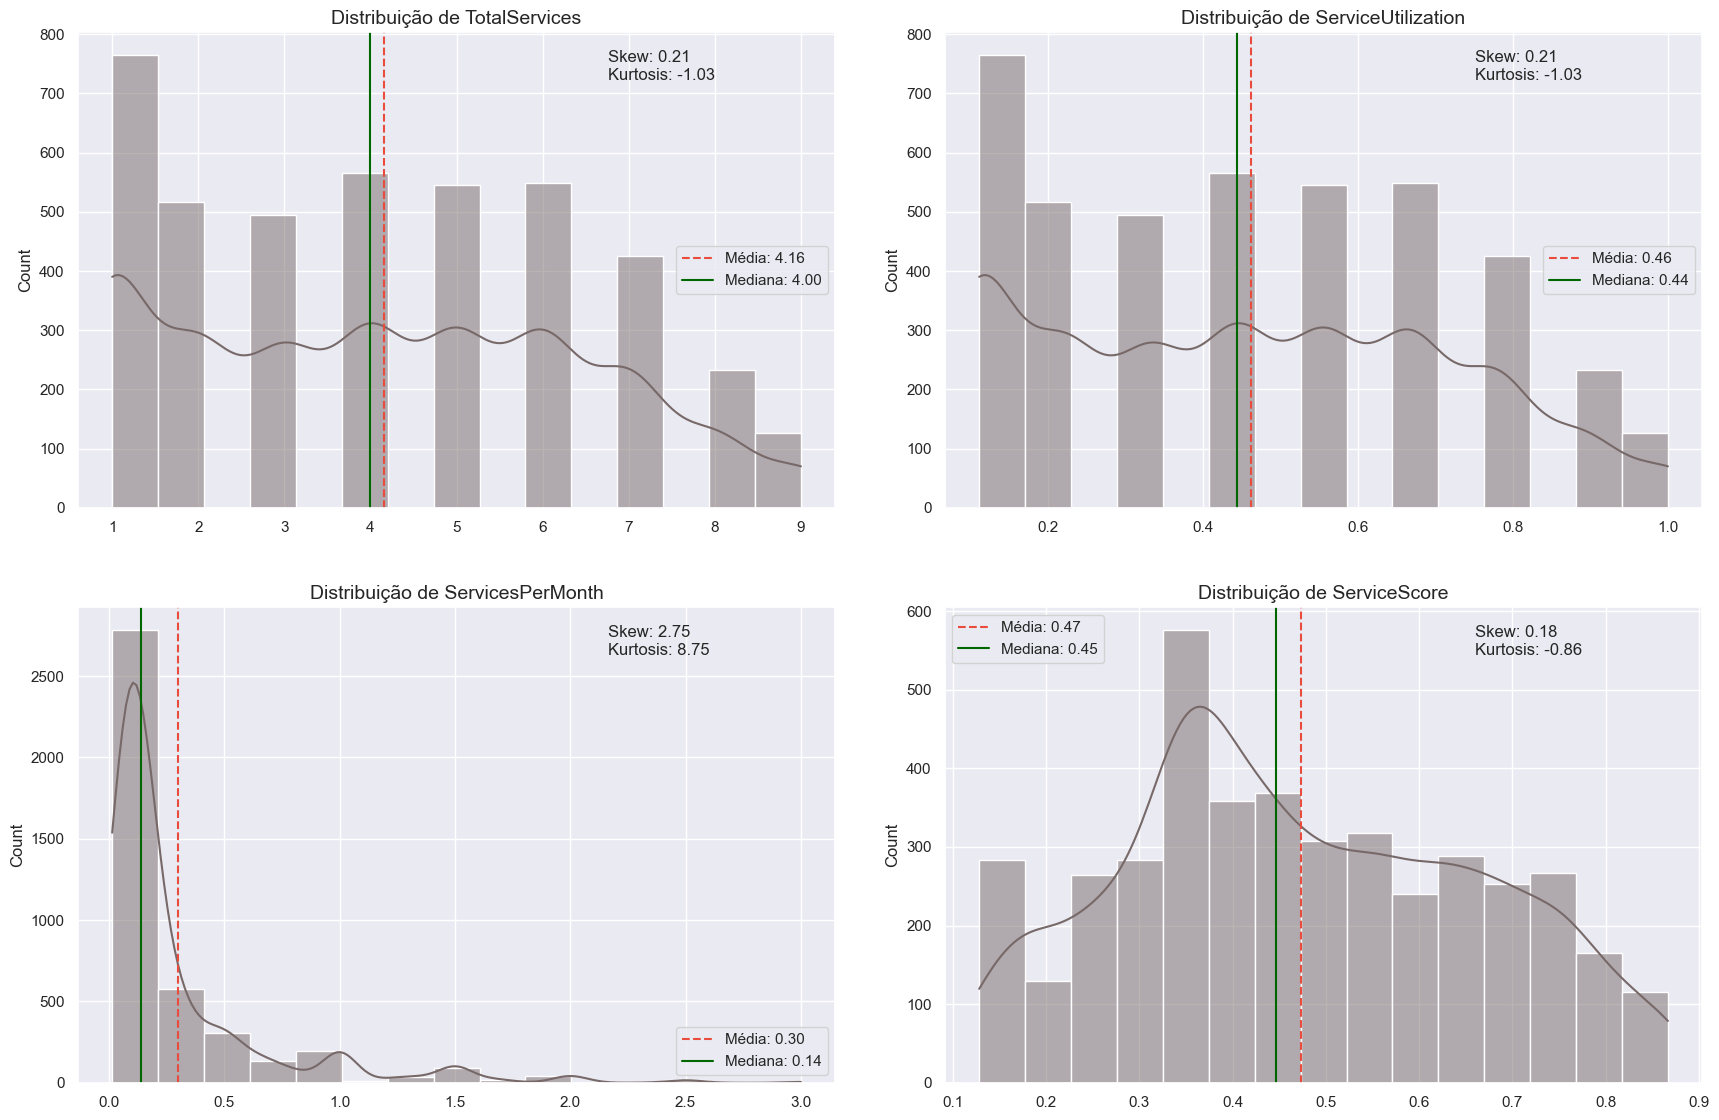

In [51]:
# Set up the figure
plt.figure(figsize=(18, 12))

# List of new features to analyze
new_features = ['TotalServices', 'ServiceUtilization', 'ServicesPerMonth', 'ServiceScore']

# Plot distribution for each feature
for i, feature in enumerate(new_features, 1):
    plt.subplot(2, 2, i)
    
    # Histogram with KDE
    sns.histplot(X_train[feature], kde=True, color='#786969', bins=15)
    
    # Add vertical lines for mean and median
    plt.axvline(X_train[feature].mean(), color='#E94B3C', linestyle='--', label=f'Média: {X_train[feature].mean():.2f}')
    plt.axvline(X_train[feature].median(), color='#006600', linestyle='-', label=f'Mediana: {X_train[feature].median():.2f}')
    
    plt.title(f'Distribuição de {feature}', fontsize=14)
    plt.xlabel('')
    plt.legend()
    
    # Add skewness/kurtosis annotation
    skewness = X_train[feature].skew()
    kurtosis = X_train[feature].kurtosis()
    plt.annotate(f'Skew: {skewness:.2f}\nKurtosis: {kurtosis:.2f}',
                 xy=(0.7, 0.9), xycoords='axes fraction')

plt.tight_layout(pad=3.0)
plt.show()

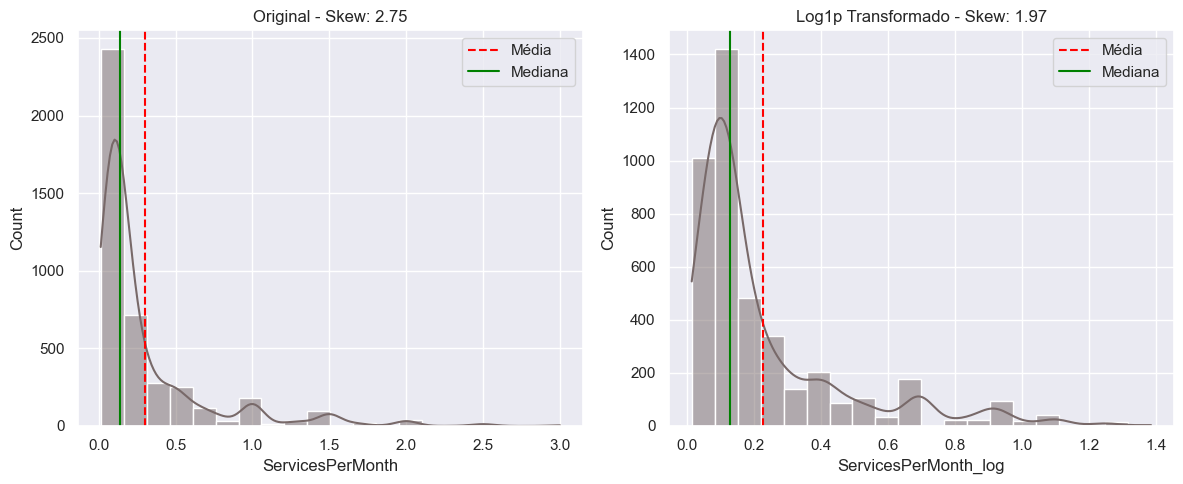

In [52]:
# Corrige a skewness apenas de ServicesPerMonth
X_train['ServicesPerMonth_log'] = np.log1p(X_train['ServicesPerMonth'])
X_val['ServicesPerMonth_log']   = np.log1p(X_val['ServicesPerMonth'])
X_test['ServicesPerMonth_log']  = np.log1p(X_test['ServicesPerMonth'])

# Plot comparativo antes/depois
plt.figure(figsize=(12, 5))

# Antes
plt.subplot(1, 2, 1)
sns.histplot(X_train['ServicesPerMonth'], kde=True, color='#786969', bins=20)
plt.axvline(X_train['ServicesPerMonth'].mean(), color='red', linestyle='--', label='Média')
plt.axvline(X_train['ServicesPerMonth'].median(), color='green', linestyle='-', label='Mediana')
plt.title(f'Original - Skew: {X_train["ServicesPerMonth"].skew():.2f}')
plt.legend()

# Depois
plt.subplot(1, 2, 2)
sns.histplot(X_train['ServicesPerMonth_log'], kde=True, color='#786969', bins=20)
plt.axvline(X_train['ServicesPerMonth_log'].mean(), color='red', linestyle='--', label='Média')
plt.axvline(X_train['ServicesPerMonth_log'].median(), color='green', linestyle='-', label='Mediana')
plt.title(f'Log1p Transformado - Skew: {X_train["ServicesPerMonth_log"].skew():.2f}')
plt.legend()

plt.tight_layout()
plt.show()


In [53]:
# Dropando a coluna original 'ServicesPerMonth' e mantendo apenas a versão log transformada
X_train = X_train.drop(columns=['ServicesPerMonth'])
X_val = X_val.drop(columns=['ServicesPerMonth'])
X_test = X_test.drop(columns=['ServicesPerMonth'])

# Verificação
print("Colunas no conjunto de dados após a remoção:")
print(X_train.columns)

Colunas no conjunto de dados após a remoção:
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'TotalServices', 'ServiceUtilization',
       'ServiceScore', 'ServicesPerMonth_log'],
      dtype='object')


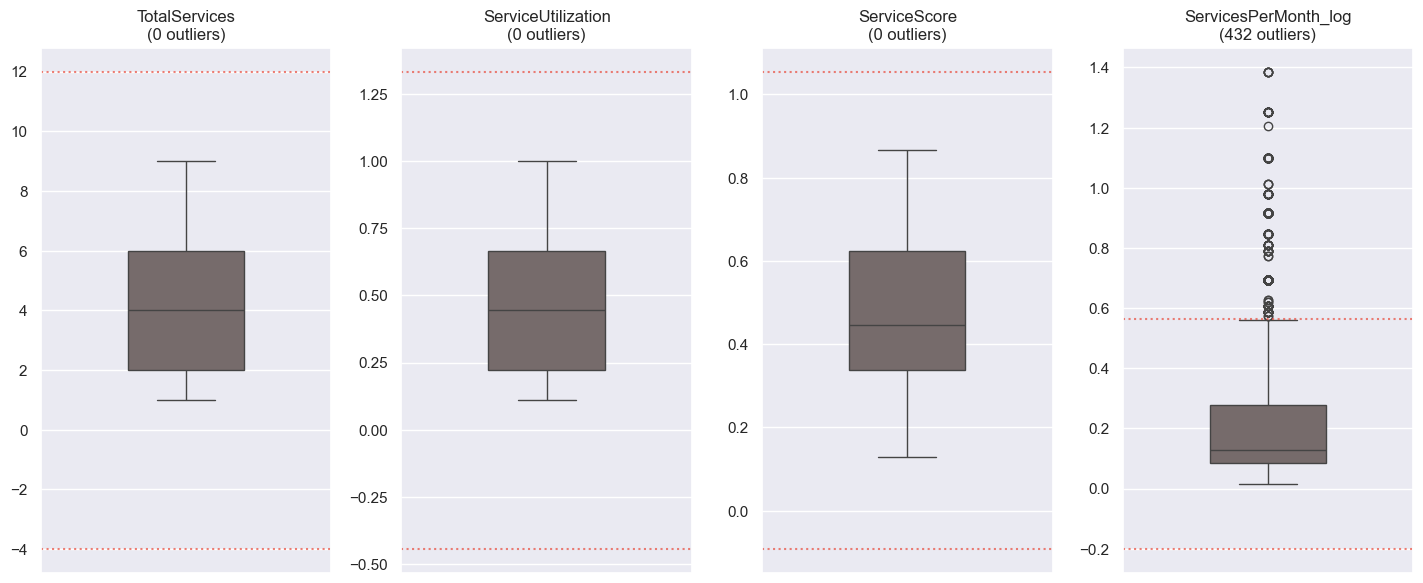


Resumo de Outliers por Feature:
TotalServices: 0 outliers (0.0%)
ServiceUtilization: 0 outliers (0.0%)
ServiceScore: 0 outliers (0.0%)
ServicesPerMonth_log: 432 outliers (10.2%)

 Registros antes: 4219
 Registros após remoção de outliers: 3787


In [54]:
# Lista de novas features analisadas
new_features = ['TotalServices', 'ServiceUtilization', 'ServiceScore', 'ServicesPerMonth_log']

# Inicializa lista de índices a remover (duplicatas evitadas com set)
outlier_indices = set()

plt.figure(figsize=(18, 6))

# Loop para visualização e detecção de outliers
for i, feature in enumerate(new_features, 1):
    plt.subplot(1, 5, i)
    
    # Boxplot
    sns.boxplot(y=X_train[feature], color='#786969', width=0.4)
    
    # Cálculo dos limites IQR
    q1 = X_train[feature].quantile(0.25)
    q3 = X_train[feature].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr

    # Detecção dos outliers
    outliers = X_train[(X_train[feature] > upper_bound) | (X_train[feature] < lower_bound)]
    
    # Apenas se houver outliers, armazenar os índices
    if not outliers.empty:
        outlier_indices.update(outliers.index)
    
    # Título com número de outliers
    plt.title(f'{feature}\n({len(outliers)} outliers)', fontsize=12)
    plt.ylabel('')
    
    # Linhas de corte
    plt.axhline(upper_bound, color='#E94B3C', linestyle=':', alpha=0.7)
    plt.axhline(lower_bound, color='#E94B3C', linestyle=':', alpha=0.7)

plt.tight_layout()
plt.show()

# Exibe resumo
print("\nResumo de Outliers por Feature:")
for feature in new_features:
    q1, q3 = X_train[feature].quantile([0.25, 0.75])
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    outliers = X_train[(X_train[feature] > upper) | (X_train[feature] < lower)]
    print(f"{feature}: {len(outliers)} outliers ({len(outliers)/len(X_train)*100:.1f}%)")

# Criação de nova base sem outliers detectados
X_train_clean = X_train.drop(index=outlier_indices)
y_train_clean = y_train.loc[X_train_clean.index]

print(f"\n Registros antes: {len(X_train)}")
print(f" Registros após remoção de outliers: {len(X_train_clean)}")


#### <font color = '#6495ED'>**3.2. Correlation Numerical Variables**</font>

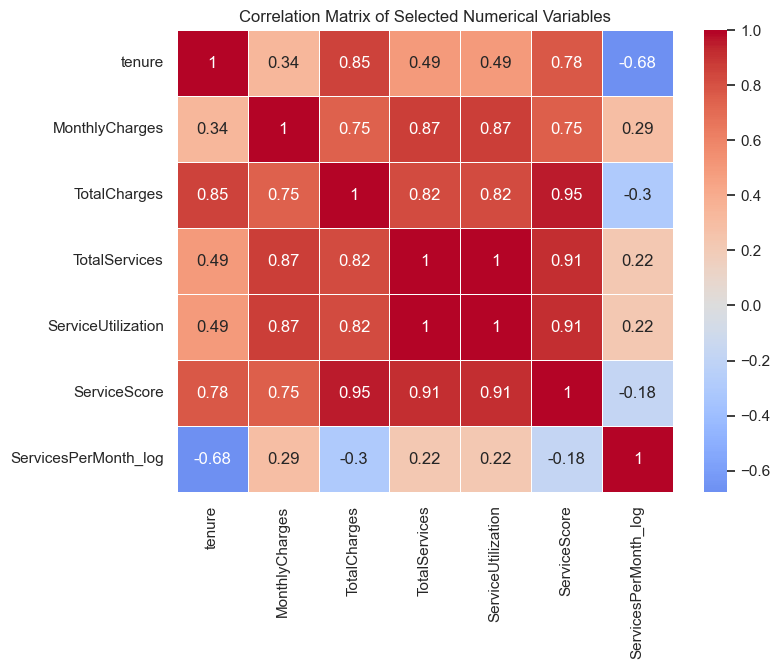

In [55]:
numerical_cols = X_train_clean.select_dtypes(include=['int64', 'float64']).columns

# calculate the Spearman correlation matrix
corr = X_train_clean[numerical_cols].corr(method='spearman')

# plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, linewidths=0.5)

plt.title('Correlation Matrix of Selected Numerical Variables')
plt.show()

#### <font color = '#6495ED'>**3.3. Visualizing Correlation Matrix with the target**</font>

To generate a correlation matrix visualization, a new dataframe is constructed, incorporating values solely from x_train and y_train.

This deliberate exclusion of external data ensures the preservation of data integrity within the training set, thereby mitigating the risk of data leakage.


 Mutual Information Scores (Feature Importance Relative to Target):
ServiceScore           0.08
ServicesPerMonth_log   0.07
tenure                 0.03
MonthlyCharges         0.03
TotalServices          0.02
ServiceUtilization     0.02
TotalCharges           0.01
dtype: float64


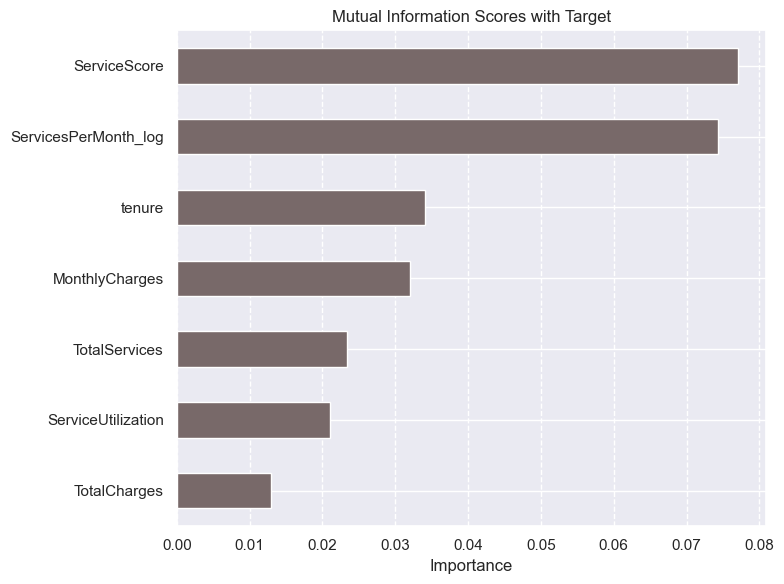

In [56]:
# Correlation with Target (Mutual Information)

# Prepare X and y for MI
X_mi = X_train_clean[numerical_cols].copy()
y_mi = y_train_clean.copy()

# Calculate Mutual Information
mi_scores = mutual_info_classif(X_mi, y_mi, discrete_features=False, random_state=42)

# Create a Series with feature names
mi_scores = pd.Series(mi_scores, index=X_mi.columns).sort_values(ascending=False)

# Display
print("\n Mutual Information Scores (Feature Importance Relative to Target):")
print(mi_scores)

# Optional: Plot
plt.figure(figsize=(8, 6))
mi_scores.plot(kind='barh', color='#786969')
plt.title('Mutual Information Scores with Target')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--')
plt.tight_layout()
plt.show()


#### <font color = '#6495ED'>**3.4. Correlation Categorical Variables**</font>


 Chi-Square Test Results (Categorical vs Target):
             Feature  Chi2 Score  p-value
0           Contract      465.16     0.00
1        TechSupport      204.65     0.00
2     OnlineSecurity      186.43     0.00
3      SeniorCitizen       82.86     0.00
4       OnlineBackup       78.93     0.00
5         Dependents       60.47     0.00
6   PaperlessBilling       53.64     0.00
7   DeviceProtection       49.66     0.00
8      MultipleLines       22.95     0.00
9      PaymentMethod       22.55     0.00
10           Partner       19.97     0.00
11   InternetService        4.57     0.03
12       StreamingTV        0.56     0.45
13            gender        0.06     0.80
14   StreamingMovies        0.06     0.81
15      PhoneService        0.00     1.00


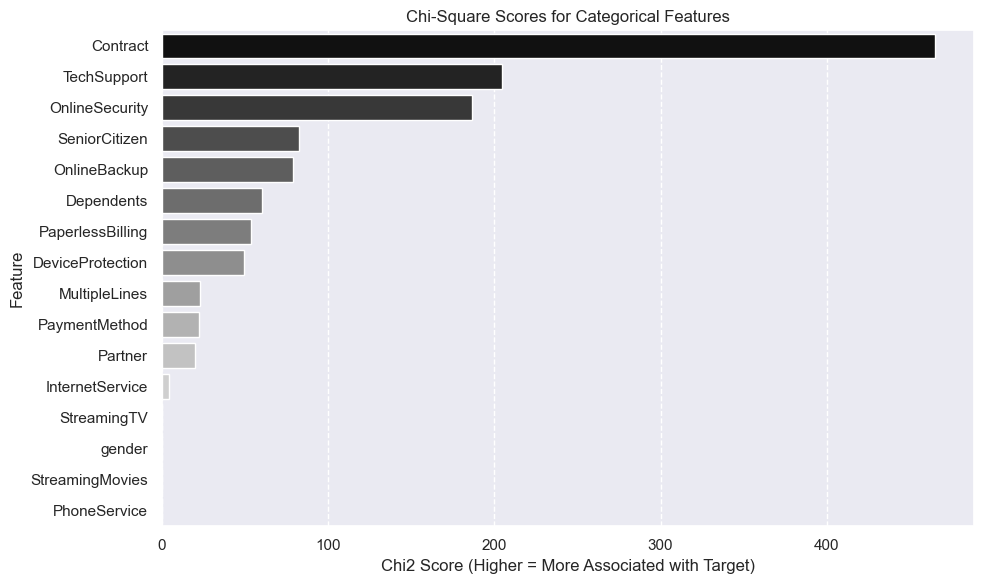

In [57]:
# Isola apenas colunas categóricas
categorical_cols = X_train_clean.select_dtypes(include='object').columns

# Cópia para transformação
X_cat = X_train_clean[categorical_cols].copy()
y_cat = y_train_clean.copy()

# Codifica todas as categorias com LabelEncoder (individuais por coluna)
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_cat[col] = le.fit_transform(X_cat[col])
    encoders[col] = le  # Salva se precisar inverter depois

# Aplica o teste qui-quadrado
chi_scores, p_values = chi2(X_cat, y_cat)

# Cria DataFrame com resultados
chi_df = pd.DataFrame({
    'Feature': categorical_cols,
    'Chi2 Score': chi_scores,
    'p-value': p_values
}).sort_values(by='Chi2 Score', ascending=False).reset_index(drop=True)

# Exibe
print("\n Chi-Square Test Results (Categorical vs Target):")
print(chi_df)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=chi_df, x='Chi2 Score', y='Feature', palette='Greys_r')
plt.title('Chi-Square Scores for Categorical Features')
plt.xlabel('Chi2 Score (Higher = More Associated with Target)')
plt.grid(True, axis='x', linestyle='--')
plt.tight_layout()
plt.show()


#### <font color = '#6495ED'>**3.5 Drop redundant features**</font>

In [58]:
features_to_drop = [
    # Multicollinear numerical features
    'TotalServices',    
    'ServiceUtilization', 
    'TotalCharges',
    
    # caletorical features
    'StreamingTV', 'PhoneService',
    'StreamingMovies', 'gender'
]

In [59]:
X_train_final = X_train_clean.drop(columns=features_to_drop)
X_test_final = X_test.drop(columns=features_to_drop)
X_val_final = X_val.drop(columns=features_to_drop)

In [60]:
X_train_final.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'ServiceScore', 'ServicesPerMonth_log'],
      dtype='object')

In [61]:
X_test_final.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'ServiceScore', 'ServicesPerMonth_log'],
      dtype='object')

In [62]:
X_val_final.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'ServiceScore', 'ServicesPerMonth_log'],
      dtype='object')

In [63]:
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_val shape: (1406, 23)
y_val shape: (1406,)


### <font color = '#6495ED'>**4. Model Assessment**</font>

#### <font color = '#6495ED'>**4.1 Cross Validation**</font>

**Objetivo do Negócio (BI Context)**\
O foco principal é reter clientes propensos a sair (churn).\
Logo, minimizar falsos negativos (clientes que churnam, mas o modelo não detecta) é mais importante do que minimizar falsos positivos.
- Importância maior em Recall (Sensibilidade)
- Falsos positivos (clientes que ficariam, mas que você tenta reter) geram custo, mas são preferíveis a perder clientes de verdade.


=== Training XGBoost ===
Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Fitting 3 folds for each of 432 candidates, totalling 1296 fits

Best F1: 0.5444
Best F2: 0.7089
ROC AUC: 0.8309
PR AUC: 0.5867
EMPC: 89.2637
Optimal Threshold: 0.1367

Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'reg_alpha': 1, 'reg_lambda': 1}

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.62      0.75       987
           1       0.39      0.89      0.54       276

    accuracy                           0.68      1263
   macro avg       0.67      0.75      0.65      1263
weighted avg       0.83      0.68      0.70      1263


Confusion Matrix:
 [[608 379]
 [ 31 245]]

Selected Features:
Fold 1:
  Numerical: ['MonthlyCharges', 'ServicesPerMonth_log']
  Categorical: ['SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'OnlineSecurit

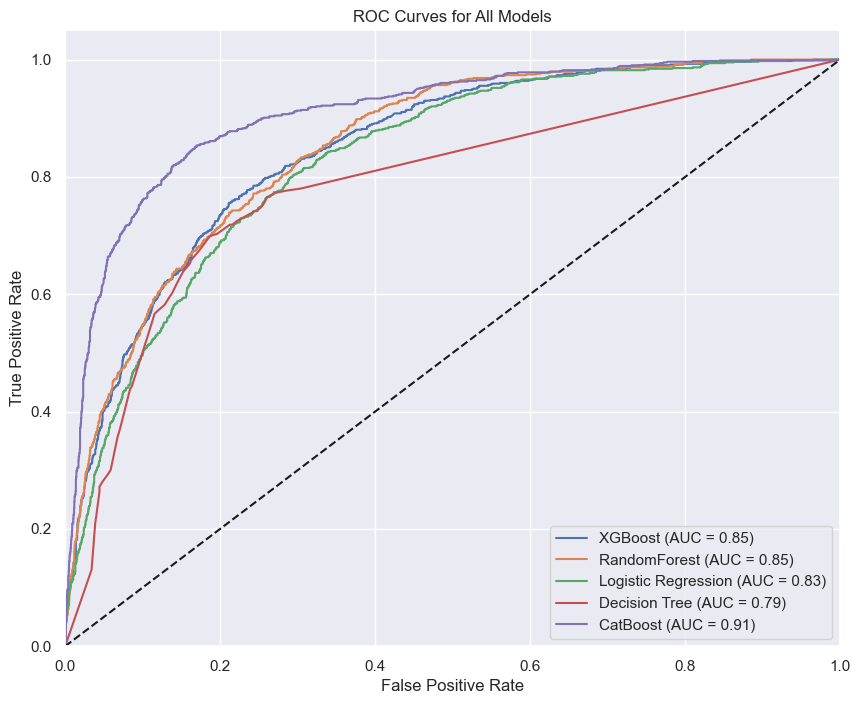

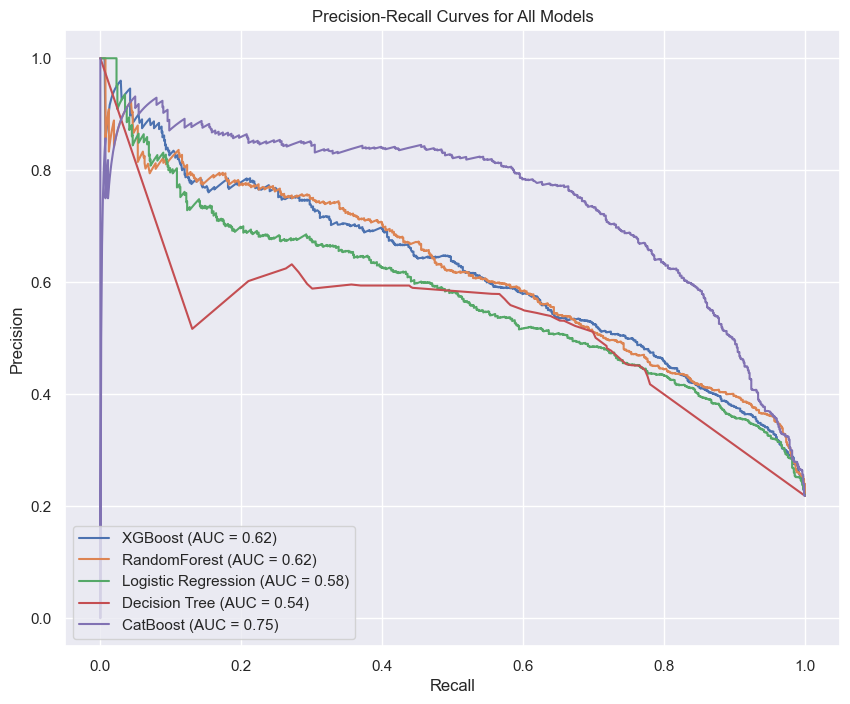

In [ ]:
# Set random seed
np.random.seed(369)

# Identify numerical columns
numerical_columns = X_train_final.select_dtypes(include=np.number).columns.tolist()
categorical_columns = X_train_final.select_dtypes(exclude=np.number).columns.tolist()

# Encode target labels (already binary 0/1)
y_train_encoded = y_train_clean  # No need for LabelEncoder since already 0/1

# Define models
models = {
    'XGBoost': XGBClassifier(random_state=369, use_label_encoder=False, eval_metric='logloss'),
    'RandomForest': RandomForestClassifier(random_state=369, class_weight='balanced'),
    'Logistic Regression': LogisticRegression(random_state=369),
    'Decision Tree': DecisionTreeClassifier(random_state=369),
    'CatBoost': CatBoostClassifier(random_state=369, verbose=0)
}

# Expanded hyperparameter grids
param_grids = {
    'XGBoost': {
        'n_estimators': [50, 100, 300, 500],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.001, 0.01, 0.1, 0.2],
        'reg_alpha': [0, 0.5, 1],
        'reg_lambda': [0.5, 1, 2]
    },
    'RandomForest': {
        'n_estimators': [50, 100, 200, 300],
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Decision Tree": {'max_depth': [10, 20, 30, None], 'class_weight': [None, 'balanced']},
    "Logistic Regression": {'C': [0.001, 0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced'], 'solver': ['saga'], 'max_iter': [300]},
    'CatBoost': {
        'iterations': [50, 100, 300, 500],
        'depth': [3, 5, 7],
        'learning_rate': [0.001, 0.01, 0.1, 0.2],
        'l2_leaf_reg': [1, 3, 5]
    }
}

# Initialize scaler
label_encoders = {col: LabelEncoder() for col in categorical_columns}
scaler = RobustScaler()

# Function to calculate EMPC (Expected Misclassification Profit/Cost)
def calculate_empc(y_true, y_pred, profit_matrix):
    cm = confusion_matrix(y_true, y_pred)
    total_profit = 0
    for i in range(len(profit_matrix)):
        for j in range(len(profit_matrix)):
            total_profit += cm[i,j] * profit_matrix[i,j]
    return total_profit / len(y_true)

# Profit matrix for binary classification
profit_matrix = np.array([
    [0, -40],   # True negative (correct non-churn), False positive
    [-300, 560]   # False negative, True positive (correct churn)
])

# Store feature names used in training for each model
model_feature_names = {}

# === Enhanced Cross-validation function with F2 optimization ===
def cross_validate_with_stratified(model_name, model, param_grid, X_train, y_train):
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=369)
    best_model_result = {
        'best_f1_score': -1,
        'best_f2_score': -1,
        'best_classification_report': '', 
        'best_params': None, 
        'best_selected_features': {},
        'best_confusion_matrix': None,
        'best_roc_auc': -1,
        'best_pr_auc': -1,
        'best_empc': -np.inf,
        'best_model': None,
        'best_threshold': 0.5,
        'feature_names': None
    }
    
    for fold_idx, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
        # Split into folds
        X_train_fold, X_val_cv = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_cv = y_train[train_idx], y_train[val_idx]
        
        # Encode categorical features
        for col in categorical_columns:
            label_encoders[col].fit(X_train_fold[col])
            X_train_fold[col] = label_encoders[col].transform(X_train_fold[col])
            X_val_cv[col] = X_val_cv[col].apply(
                lambda x: label_encoders[col].transform([x])[0] 
                if x in label_encoders[col].classes_ else -1
            )

        # Scale numerical features
        scaler.fit(X_train_fold[numerical_columns])
        X_train_fold[numerical_columns] = scaler.transform(X_train_fold[numerical_columns])
        X_val_cv[numerical_columns] = scaler.transform(X_val_cv[numerical_columns])

        # Enhanced Feature Selection
        # 1. Numerical features using Random Forest importance
        rf_selector = RandomForestClassifier(n_estimators=100, random_state=369, class_weight='balanced')
        rf_selector.fit(X_train_fold[numerical_columns], y_train_fold)
        feature_importances = rf_selector.feature_importances_
        
        # Use median instead of mean for importance threshold
        importance_threshold = np.median(feature_importances)
        selected_numerical = [
            numerical_columns[i] for i, imp in enumerate(feature_importances) 
            if imp >= importance_threshold
        ]
        
        # 2. Categorical features using Chi-Square with stricter threshold
        chi2_selector = SelectKBest(chi2, k='all')
        chi2_selector.fit(X_train_fold[categorical_columns], y_train_fold)
        p_values = chi2_selector.pvalues_
        
        # More stringent p-value threshold (0.001 instead of 0.01)
        p_value_threshold = 0.005
        selected_categorical = [
            categorical_columns[i] for i, p_val in enumerate(p_values) 
            if p_val <= p_value_threshold
        ]
        
        # Combine selected features
        selected_features = selected_numerical + selected_categorical
        X_train_fold = X_train_fold[selected_features]
        X_val_cv = X_val_cv[selected_features]
        
        # Store selected features
        best_model_result['best_selected_features'][f'Fold {fold_idx+1}'] = {
            'numerical_features': selected_numerical,
            'categorical_features': selected_categorical
        }
        
        # === Define the Pipeline with SMOTE-ENN and Classifier ===
        # The 'classifier__' prefix in param_grid links to the 'classifier' step in the pipeline
        pipeline = Pipeline([
            ('sampling', SMOTEENN(random_state=369)), # Use SMOTEENN here
            ('classifier', model)
        ])

        # Define the custom F2 scorer
        f2_scorer = make_scorer(fbeta_score, beta=2)

        # Then, in GridSearchCV:
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grid,
            scoring=f2_scorer, # Change this line
            cv=3,
            verbose=1,
            n_jobs=-1
        )
        grid_search.fit(X_train_fold, y_train_fold)
        best_model = grid_search.best_estimator_

        # Get probabilities and find optimal threshold using F2-score
        y_val_cv_proba = best_model.predict_proba(X_val_cv)[:, 1]
        precision, recall, thresholds = precision_recall_curve(y_val_cv, y_val_cv_proba)
        
        # Calculate F2-scores for all thresholds (beta=2 emphasizes recall)
        f2_scores = [fbeta_score(y_val_cv, (y_val_cv_proba >= t).astype(int), beta=2) 
                    for t in thresholds]
        optimal_idx = np.argmax(f2_scores)
        optimal_threshold = thresholds[optimal_idx]
        y_val_cv_pred = (y_val_cv_proba >= optimal_threshold).astype(int)
        
        # Calculate all metrics
        metrics = {
            'f1': f1_score(y_val_cv, y_val_cv_pred),
            'f2': f2_scores[optimal_idx],  # Best F2-score
            'roc_auc': roc_auc_score(y_val_cv, y_val_cv_proba),
            'pr_auc': average_precision_score(y_val_cv, y_val_cv_proba),
            'cm': confusion_matrix(y_val_cv, y_val_cv_pred),
            'empc': calculate_empc(y_val_cv, y_val_cv_pred, profit_matrix)
        }

        # Update best model if F1 score improves (or could use F2 here)
        if metrics['f1'] > best_model_result['best_f1_score']:
            best_model_result.update({
                'best_f1_score': metrics['f1'],
                'best_f2_score': metrics['f2'],
                'best_classification_report': classification_report(y_val_cv, y_val_cv_pred),
                'best_params': grid_search.best_params_,
                'best_confusion_matrix': metrics['cm'],
                'best_roc_auc': metrics['roc_auc'],
                'best_pr_auc': metrics['pr_auc'],
                'best_empc': metrics['empc'],
                'best_model': best_model,
                'best_threshold': optimal_threshold,
                'feature_names': selected_features
            })

    return best_model_result

# === Run cross-validation ===
results = {}
for model_name, model in models.items():
    print(f"\n=== Training {model_name} ===")
    best_result = cross_validate_with_stratified(
        model_name, model, param_grids[model_name], X_train_final, y_train_encoded
    )
    results[model_name] = best_result
    model_feature_names[model_name] = best_result['feature_names']
    
    # Print results
    print(f"\nBest F1: {best_result['best_f1_score']:.4f}")
    print(f"Best F2: {best_result['best_f2_score']:.4f}")  # New F2 metric
    print(f"ROC AUC: {best_result['best_roc_auc']:.4f}")
    print(f"PR AUC: {best_result['best_pr_auc']:.4f}")
    print(f"EMPC: {best_result['best_empc']:.4f}")
    print(f"Optimal Threshold: {best_result['best_threshold']:.4f}")
    print("\nBest Parameters:", best_result['best_params'])
    print("\nClassification Report:\n", best_result['best_classification_report'])
    print("\nConfusion Matrix:\n", best_result['best_confusion_matrix'])
    print("\nSelected Features:")
    for fold, features in best_result['best_selected_features'].items():
        print(f"{fold}:")
        print("  Numerical:", features['numerical_features'])
        print("  Categorical:", features['categorical_features'])
    print("\n" + "="*80)

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
for model_name, result in results.items():
    best_model = result['best_model']
    
    # Prepare validation set for ROC curve
    X_val_cv = X_train_final.copy()
    y_val_cv = y_train_encoded.copy()
    
    # Apply same preprocessing
    for col in categorical_columns:
        X_val_cv[col] = label_encoders[col].transform(X_val_cv[col])
    X_val_cv[numerical_columns] = scaler.transform(X_val_cv[numerical_columns])
    
    # Select only the features used in training
    X_val_cv = X_val_cv[model_feature_names[model_name]]
    
    # Get probabilities
    y_cv_proba = best_model.predict_proba(X_val_cv)[:, 1]
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_val_cv, y_cv_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curves for all models
plt.figure(figsize=(10, 8))
for model_name, result in results.items():
    best_model = result['best_model']
    
    # Prepare validation set
    X_val_cv = X_train_final.copy()
    y_val_cv = y_train_encoded.copy()
    
    # Apply same preprocessing
    for col in categorical_columns:
        X_val_cv[col] = label_encoders[col].transform(X_val_cv[col])
    X_val_cv[numerical_columns] = scaler.transform(X_val_cv[numerical_columns])
    
    # Select only the features used in training
    X_val_cv = X_val_cv[model_feature_names[model_name]]
    
    # Get probabilities
    y_cv_proba = best_model.predict_proba(X_val_cv)[:, 1]
    
    # Compute Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_val_cv, y_cv_proba)
    pr_auc = auc(recall, precision)
    
    plt.plot(recall, precision, label=f'{model_name} (AUC = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for All Models')
plt.legend(loc="lower left")
plt.show()

#### <font color = '#6495ED'>**4.2 Feature Selection**</font>

In [78]:
columns_to_keep = ['MonthlyCharges', 'ServicesPerMonth_log',
                  'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
                  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                  'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [79]:
# Keep only the specified columns
X_train = X_train_final[columns_to_keep].copy()
X_val = X_val_final[columns_to_keep].copy()
X_test = X_test_final[columns_to_keep].copy()

In [80]:
numerical_columns = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_columns = X_train.select_dtypes(exclude=np.number).columns.tolist()

In [81]:
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_val shape: (1406, 13)
y_val shape: (1406,)


#### <font color = '#6495ED'>**4.3 Scale & Encoding**</font>

In [82]:
# Create encoders and scaler
label_encoders = {col: LabelEncoder() for col in categorical_columns}
scaler = RobustScaler()

# Encode categorical features with unseen value handling
for col in categorical_columns:
    le = label_encoders[col]
    le.fit(X_train[col])
    
    # Encode training set
    X_train[col] = le.transform(X_train[col])
    
    # Add placeholder for unseen values
    le.classes_ = np.append(le.classes_, '___unseen___')  # Dummy label
    unseen_label = -1
    
    # Encode validation and test sets with fallback for unknowns
    X_val[col] = X_val[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else unseen_label)
    X_test[col] = X_test[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else unseen_label)

# Scale numerical features
scaler.fit(X_train[numerical_columns])
X_train[numerical_columns] = scaler.transform(X_train[numerical_columns])
X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Final preprocessed DataFrames (drop index only if needed)
X_train_preprocessed_df = X_train.copy()
X_val_preprocessed_df = X_val.copy()
X_test_preprocessed_df = X_test.copy()

# Get categorical column indices (used by CatBoost)
categorical_feature_indices = [X_train.columns.get_loc(col) for col in categorical_columns]


#### <font color = '#6495ED'>**4.4 Oversampling**</font>

In [ ]:
# Corrected resampling configuration
sampler = SMOTEENN(
    sampling_strategy='auto',
    smote=SMOTE(k_neighbors=5, random_state=369),
    enn=EditedNearestNeighbours(kind_sel='all', n_neighbors=10),  # Changed to 'all'
    random_state=369
)

# Apply resampling
X_train_resampled, y_train_resampled = sampler.fit_resample(
    X_train_preprocessed_df, 
    y_train_clean
)

# Print class distributions
print("Original class distribution:", Counter(y_train_clean))
print("Resampled class distribution:", Counter(y_train_resampled))

Original class distribution: Counter({0: 2959, 1: 828})
Original class distribution: Counter({0: 2959, 1: 828})
Resampled class distribution: Counter({0: 2959, 1: 769})


### <font color = '#6495ED'>**5. Model Evaluation**</font>

#### <font color = '#6495ED'>**5.1 Validation dataset**</font>

In [ ]:
def calculate_empc(y_true, y_pred, profit_matrix):
    """Calculate Expected Misclassification Profit/Cost"""
    cm = confusion_matrix(y_true, y_pred)
    total_profit = 0
    for i in range(len(profit_matrix)):
        for j in range(len(profit_matrix)):
            total_profit += cm[i, j] * profit_matrix[i, j]
    return total_profit / len(y_true)

def evaluate_model(model, X_train, y_train, X_val, y_val, threshold=0.5):
    """
    Simplified evaluation function for sklearn models (like RandomForest)
    that don't need special Pool objects or categorical feature handling
    """
    # Train model
    model.fit(X_train, y_train)
    
    # Get predictions
    y_proba_train = model.predict_proba(X_train)[:, 1]
    y_proba_val = model.predict_proba(X_val)[:, 1]
    y_pred_train = (y_proba_train >= threshold).astype(int)
    y_pred_val = (y_proba_val >= threshold).astype(int)
    
    # Business profit matrix
    profit_matrix = np.array([
        [0, -40],   # [TN, FP]
        [-300, 560]  # [FN, TP]
    ])

    # Inner evaluation function
    def print_metrics(y_true, y_pred, y_proba, name):
        print(f"\n{name} Metrics:")
        print(classification_report(y_true, y_pred))
        print("Confusion Matrix:")
        print(confusion_matrix(y_true, y_pred))
        print(f"ROC AUC: {roc_auc_score(y_true, y_proba):.4f}")
        print(f"PR AUC: {average_precision_score(y_true, y_proba):.4f}")
        print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
        print(f"F2 Score: {fbeta_score(y_true, y_pred, beta=2):.4f}")
        print(f"EMPC: {calculate_empc(y_true, y_pred, profit_matrix):.4f}")
        print("=" * 80)

    # Run evaluation
    print_metrics(y_train, y_pred_train, y_proba_train, "Training")
    print_metrics(y_val, y_pred_val, y_proba_val, "Validation")
    
    # Plot curves
    plot_curves(y_train, y_proba_train, y_val, y_proba_val)
    
    return model, y_proba_val, y_val

def plot_curves(y_train, y_proba_train, y_val, y_proba_val):
    """Helper function to plot ROC and PR curves"""
    # ROC Curve
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_proba_train)
    fpr_val, tpr_val, _ = roc_curve(y_val, y_proba_val)
    plt.plot(fpr_train, tpr_train, label="Train ROC")
    plt.plot(fpr_val, tpr_val, label="Validation ROC")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves")
    plt.legend()
    
    # PR Curve
    plt.subplot(1, 2, 2)
    prec_train, rec_train, _ = precision_recall_curve(y_train, y_proba_train)
    prec_val, rec_val, _ = precision_recall_curve(y_val, y_proba_val)
    plt.plot(rec_train, prec_train, label="Train PR")
    plt.plot(rec_val, prec_val, label="Validation PR")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curves")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:

# Initialize model with optimal parameters from CV
randomforest_model = RandomForestClassifier(
    max_depth=3,
    min_samples_leaf=10,
    min_samples_split=2,
    n_estimators=100,
    class_weight={0: 1, 1: 7},  # 3x weight for churn instances,
    random_state=369,
    verbose=0  
)


Training Metrics:
              precision    recall  f1-score   support

           0       0.99      0.64      0.78      2959
           1       0.42      0.98      0.59       769

    accuracy                           0.71      3728
   macro avg       0.70      0.81      0.68      3728
weighted avg       0.87      0.71      0.74      3728

Confusion Matrix:
[[1901 1058]
 [  13  756]]
ROC AUC: 0.9392
PR AUC: 0.7711
F1 Score: 0.5854
F2 Score: 0.7730
EMPC: 101.1642

Validation Metrics:
              precision    recall  f1-score   support

           0       0.93      0.60      0.73      1032
           1       0.44      0.87      0.58       374

    accuracy                           0.67      1406
   macro avg       0.68      0.73      0.66      1406
weighted avg       0.80      0.67      0.69      1406

Confusion Matrix:
[[620 412]
 [ 50 324]]
ROC AUC: 0.8149
PR AUC: 0.5820
F1 Score: 0.5838
F2 Score: 0.7258
EMPC: 106.6572


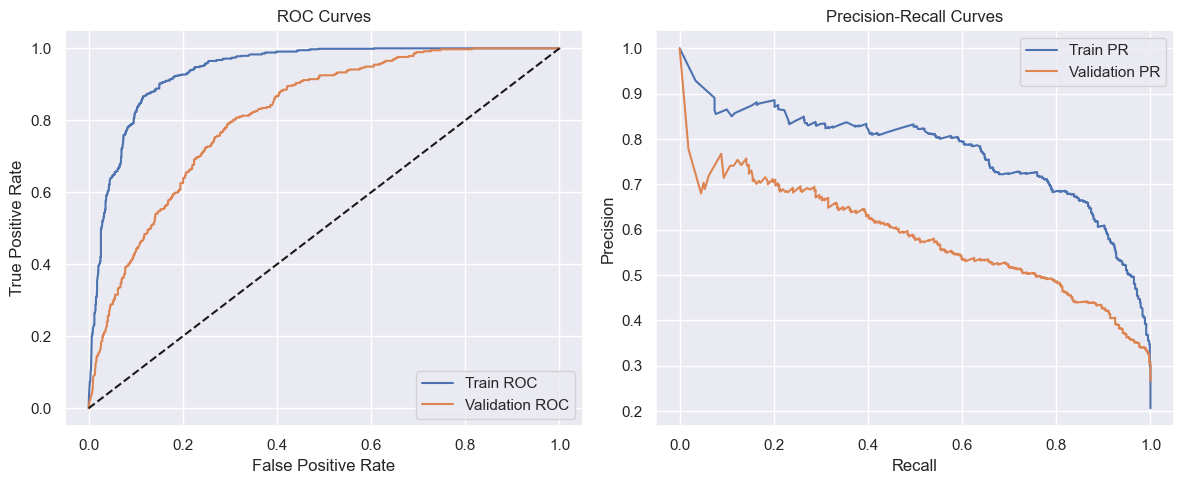

In [148]:
# Run evaluation on resampled data
trained_model, y_proba_val, y_val_used = evaluate_model(
    randomforest_model,
    X_train_resampled,  # Your resampled training data
    y_train_resampled,  # Your resampled labels
    X_val_preprocessed_df,  # Your validation features
    y_val,  # Your validation labels
    threshold=0.35  # Adjust based on your needs
)

#### <font color = '#6495ED'>**5.2 Testing dataset**</font>

In [149]:
def evaluate_rf_test(model, X_test, y_test, threshold=0.5):
    """
    Evaluate RandomForest model on test set using same metrics as validation
    
    Parameters:
    - model: Trained RandomForest model
    - X_test: Test features (DataFrame or array)
    - y_test: True test labels
    - threshold: Decision threshold (default 0.5)
    """
    # Get probabilities and predictions
    y_proba_test = model.predict_proba(X_test)[:, 1]
    y_pred_test = (y_proba_test >= threshold).astype(int)
    
    # Business profit matrix (same as validation)
    profit_matrix = np.array([
        [0, -40],   # [TN, FP]
        [-300, 560] # [FN, TP]
    ])
    
    # Calculate metrics (identical to validation evaluation)
    print("\nTest Set Metrics:")
    print(classification_report(y_test, y_pred_test))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_test))
    print(f"ROC AUC: {roc_auc_score(y_test, y_proba_test):.4f}")
    print(f"PR AUC: {average_precision_score(y_test, y_proba_test):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred_test):.4f}")
    print(f"F2 Score: {fbeta_score(y_test, y_pred_test, beta=2):.4f}")
    print(f"EMPC: {calculate_empc(y_test, y_pred_test, profit_matrix):.4f}")
    print("=" * 80)
    
    # Plot curves (same style as validation)
    plot_curves(y_test, y_proba_test, "Test Set")

def plot_curves(y_true, y_proba, dataset_name):
    """Consistent plotting with validation evaluation"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    ax1.plot(fpr, tpr, label=f"{dataset_name} ROC (AUC = {roc_auc_score(y_true, y_proba):.2f})")
    ax1.plot([0, 1], [0, 1], 'k--')
    ax1.set_xlabel("False Positive Rate")
    ax1.set_ylabel("True Positive Rate")
    ax1.set_title("ROC Curve")
    ax1.legend()
    
    # PR Curve
    precision, recall, _ = precision_recall_curve(y_true, y_proba)
    ax2.plot(recall, precision, label=f"{dataset_name} PR (AUC = {average_precision_score(y_true, y_proba):.2f})")
    ax2.set_xlabel("Recall")
    ax2.set_ylabel("Precision")
    ax2.set_title("Precision-Recall Curve")
    ax2.legend()
    
    plt.tight_layout()
    plt.show()


Test Set Metrics:
              precision    recall  f1-score   support

           0       0.94      0.58      0.72      1033
           1       0.44      0.90      0.59       374

    accuracy                           0.66      1407
   macro avg       0.69      0.74      0.65      1407
weighted avg       0.81      0.66      0.68      1407

Confusion Matrix:
[[599 434]
 [ 38 336]]
ROC AUC: 0.8298
PR AUC: 0.6022
F1 Score: 0.5874
F2 Score: 0.7414
EMPC: 113.2907


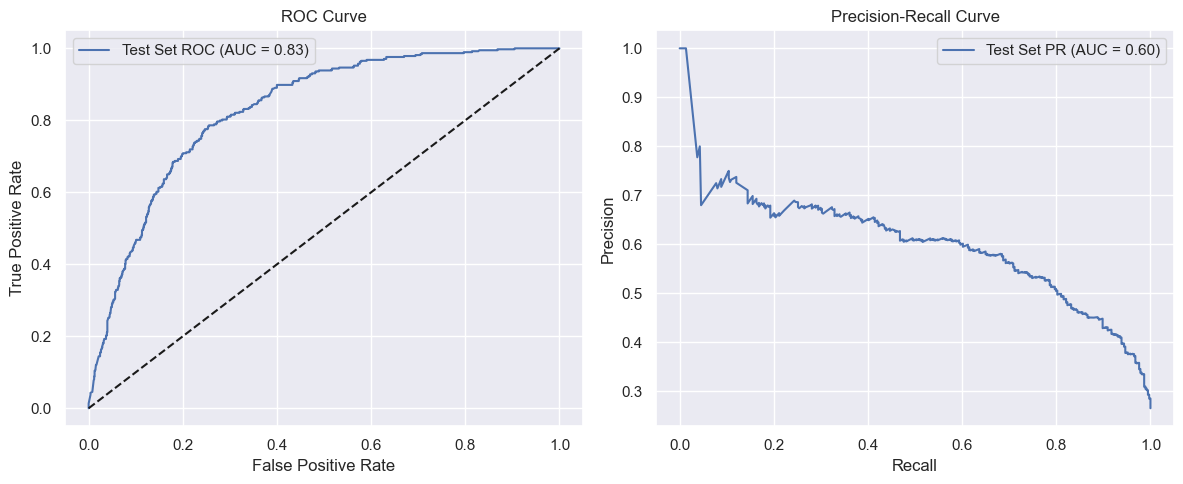

In [150]:
# Use same threshold you used for validation (or your optimized threshold)
evaluate_rf_test(
    trained_model,               # Your trained RandomForest
    X_test_preprocessed_df,      # Preprocessed test features
    y_test,                      # True test labels
    threshold=0.3193             # Same threshold used in validation
)

Metric	Training	Validation	Test	Diagnosis
Recall (Class 1)	0.98	0.87	0.90	Slight improvement (good generalization)
Precision (Class 1)	0.42	0.44	0.44	Stable but still low (56% false positives)
EMPC	101.16	106.66	113.29	Best performance on test set (no overfitting!)
ROC AUC	0.939	0.815	0.830	Slight drop from train→test (expected)

| Metric       | Validation | Test   | Change     |
| ------------ | ---------- | ------ | ---------- |
| **Recall** | 0.87       | 0.90   | ✅ Slight ↑  |
| **Precision** | 0.44     | 0.44 | ✅ Slight ↑ |
| **ROC AUC**  | 0.815     | 0.830 | ✅ Slight ↑ |
| **EMPC**     | 106.66     | 113.29 | ✅ Slight ↑ |


| **Scenario** | **Count** | **Cost/Profit** | **Total Impact** |
| --- | --- | --- | --- |
| **True Positives (TP)** | 336 | +$560 | **+$188,160** |
| **False Positives (FP)** | 434 | -$40 | **-$17,360** |
| **False Negatives (FN)** | 38 | -$300 | **-$11,400** |
| **True Negatives (TN)** | 599 | $0 | **$0** |
| **Net Profit (EMPC × 1407)** | **$113.29 × 1407 ≈ $159,400** |  |  |

These values confirm that the model generalizes well to new data and performance is consistent.

### <font color = '#6495ED'>**6. Other Visualizations**</font>

In [76]:
#!pip install shap

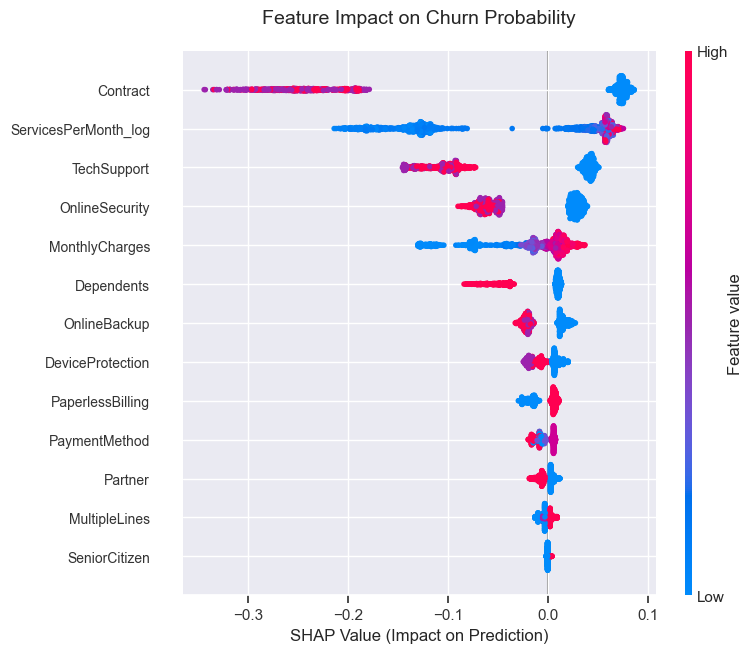

In [ ]:
# 1. Initialize explainer
explainer = shap.TreeExplainer(randomforest_model)

# 2. Get SHAP values - handle binary classification correctly
shap_values = explainer.shap_values(X_test_preprocessed_df)

# For binary classification, we need the values for class 1 (churn)
if isinstance(shap_values, list) and len(shap_values) == 2:
    shap_values = shap_values[1]
elif len(shap_values.shape) == 3:
    shap_values = shap_values[:,:,1]

# 3. Create the summary plot
plt.figure(figsize=(10, 8))
shap.summary_plot(
    shap_values,
    features=X_test_preprocessed_df,
    feature_names=X_test_preprocessed_df.columns,
    plot_type="dot",
    show=False
)

# 4. Customize the plot (without manually setting tick labels)
plt.title("Feature Impact on Churn Probability", fontsize=14, pad=20)
plt.xlabel("SHAP Value (Impact on Prediction)", fontsize=12)
plt.gca().tick_params(axis='y', labelsize=10)  # Adjust y-axis label size
plt.tight_layout()
plt.show()